In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from scipy.stats import uniform, randint
import warnings
warnings.simplefilter("ignore")

In [3]:
mobi_2021 = pd.read_excel(r"C:\Users\devin\OneDrive\Bureau\Data_Pompier\Mobilisation\LFB Mobilisation data 2021 - 2024.xlsx")

In [4]:
incident_2018_onwards= pd.read_excel(r"C:\Users\devin\OneDrive\Bureau\Data_Pompier\Incidents\LFB Incident data from 2018 onwards.csv.xlsx")

In [5]:
gps_station = pd.read_csv(r"C:\Users\devin\OneDrive\Bureau\Data_Pompier\GPS Station.csv", sep=";",encoding="ISO-8859-1")

## Mobilisation 2021 ##

In [10]:
mobi_2021.head()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId Resource_Code  \
0  000004-01012021     2021           0                 5769249          A321   
1  000005-01012021     2021           0                 5769250          F351   
2  000006-01012021     2021           0                 5769251          F412   
3  000007-01012021     2021           0                 5769252          H331   
4  000007-01012021     2021           0                 5769253          G351   

  PerformanceReporting DateAndTimeMobilised   DateAndTimeMobile  \
0                    1  2021-01-01 00:06:47 2021-01-01 00:07:35   
1                    1  2021-01-01 00:07:47 2021-01-01 00:09:41   
2                    1  2021-01-01 00:08:21 2021-01-01 00:10:32   
3                    1  2021-01-01 00:12:23 2021-01-01 00:13:16   
4                    2  2021-01-01 00:12:23 2021-01-01 00:13:32   

   DateAndTimeArrived  TurnoutTimeSeconds  ...     DateAndTimeLeft  \
0 2021-01-01 00:09:48                48.0  ... 2021-01-01 00:57:30   
1 2021-01-01 00:11:57               114.0  ... 2021-01-01 00:18:39   
2 2021-01-01 00:14:37               131.0  ... 2021-01-01 00:24:43   
3 2021-01-01 00:19:12                53.0  ... 2021-01-01 00:40:49   
4 2021-01-01 00:19:48                69.0  ... 2021-01-01 00:29:54   

   DateAndTimeReturned DeployedFromStation_Code  DeployedFromStation_Name  \
0                  NaN                      A32                   Hornsey   
1                  NaN                      F35                  Woodford   
2                  NaN                      F41                  Dagenham   
3                  NaN                      H33                Wandsworth   
4                  NaN                      G35                    Fulham   

  DeployedFromLocation PumpOrder PlusCode_Code  PlusCode_Description  \
0         Home Station         1       Initial  Initial Mobilisation   
1         Home Station         1       Initial  Initial Mobilisation   
2         Home Station         1       Initial  Initial Mobilisation   
3         Home Station         1       Initial  Initial Mobilisation   
4         Home Station         2       Initial  Initial Mobilisation   

  DelayCodeId     DelayCode_Description  
0         NaN                       NaN  
1         NaN                       NaN  
2        12.0               Not held up  
3         8.0  Traffic calming measures  
4         NaN                       NaN  

[5 rows x 22 columns]

In [11]:
mobi_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587919 entries, 0 to 587918
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   IncidentNumber            587919 non-null  object        
 1   CalYear                   587919 non-null  int64         
 2   HourOfCall                587919 non-null  int64         
 3   ResourceMobilisationId    587919 non-null  int64         
 4   Resource_Code             587919 non-null  object        
 5   PerformanceReporting      587919 non-null  object        
 6   DateAndTimeMobilised      587919 non-null  datetime64[ns]
 7   DateAndTimeMobile         585390 non-null  datetime64[ns]
 8   DateAndTimeArrived        587919 non-null  datetime64[ns]
 9   TurnoutTimeSeconds        585372 non-null  float64       
 10  TravelTimeSeconds         585374 non-null  float64       
 11  AttendanceTimeSeconds     587919 non-null  int64         
 12  Da

In [12]:
mobi_2021.describe()

CalYear     HourOfCall  ResourceMobilisationId  \
count  587919.000000  587919.000000            5.879190e+05   
mean     2022.258306      13.335888            6.203947e+06   
min      2021.000000       0.000000            5.769249e+06   
25%      2021.000000       9.000000            5.983400e+06   
50%      2022.000000      14.000000            6.204396e+06   
75%      2023.000000      19.000000            6.425224e+06   
max      2024.000000      23.000000            6.645201e+06   
std         0.971986       6.407685            2.542291e+05   

                DateAndTimeMobilised              DateAndTimeMobile  \
count                         587919                         585390   
mean   2022-09-28 00:51:11.930602496  2022-09-27 23:32:29.076929536   
min              2021-01-01 00:06:47            2021-01-01 00:07:35   
25%              2021-12-04 20:55:00     2021-12-04 21:18:41.500000   
50%              2022-10-06 19:11:00            2022-10-06 17:52:46   
75%       2023-07-28 20:08:34.500000  2023-07-28 19:06:01.750000128   
max              2024-04-29 23:59:36            2024-04-30 00:02:20   
std                              NaN                            NaN   

                  DateAndTimeArrived  TurnoutTimeSeconds  TravelTimeSeconds  \
count                         587919       585372.000000      585374.000000   
mean   2022-09-28 00:57:07.751988224           73.693889         283.196083   
min              2021-01-01 00:09:48            0.000000           0.000000   
25%       2021-12-04 21:00:27.500000           51.000000         183.000000   
50%              2022-10-06 19:15:42           70.000000         259.000000   
75%              2023-07-28 20:12:34           90.000000         355.000000   
max              2024-04-30 00:04:26         1192.000000        1180.000000   
std                              NaN           40.431050         149.259150   

       AttendanceTimeSeconds                DateAndTimeLeft  \
count          587919.000000                         587696   
mean              355.821385  2022-09-28 01:44:28.466557440   
min                 0.000000            2021-01-01 00:18:39   
25%               256.000000     2021-12-04 21:38:54.500000   
50%               333.000000     2022-10-06 20:10:27.500000   
75%               430.000000            2023-07-28 20:41:40   
max              1200.000000            2024-04-30 01:33:08   
std               151.999921                            NaN   

       DateAndTimeReturned      PumpOrder    DelayCodeId  
count                  0.0  587919.000000  145365.000000  
mean                   NaN       1.538125      10.654160  
min                    NaN       1.000000       3.000000  
25%                    NaN       1.000000       9.000000  
50%                    NaN       1.000000      12.000000  
75%                    NaN       2.000000      12.000000  
max                    NaN      13.000000      13.000000  
std                    NaN       0.920319       2.015382

In [13]:
(mobi_2021.isnull().sum()/len(mobi_2021))*100

IncidentNumber                0.000000
CalYear                       0.000000
HourOfCall                    0.000000
ResourceMobilisationId        0.000000
Resource_Code                 0.000000
PerformanceReporting          0.000000
DateAndTimeMobilised          0.000000
DateAndTimeMobile             0.430161
DateAndTimeArrived            0.000000
TurnoutTimeSeconds            0.433223
TravelTimeSeconds             0.432883
AttendanceTimeSeconds         0.000000
DateAndTimeLeft               0.037930
DateAndTimeReturned         100.000000
DeployedFromStation_Code      0.000680
DeployedFromStation_Name      0.000680
DeployedFromLocation          0.075351
PumpOrder                     0.000000
PlusCode_Code                 0.000000
PlusCode_Description          0.000000
DelayCodeId                  75.274655
DelayCode_Description        75.274655
dtype: float64

In [14]:
mobi_2021.duplicated().sum()

0

In [6]:
mobi_2021 = mobi_2021.drop(columns = "DateAndTimeReturned")

In [16]:
print(mobi_2021.columns)

Index(['IncidentNumber', 'CalYear', 'HourOfCall', 'ResourceMobilisationId',
       'Resource_Code', 'PerformanceReporting', 'DateAndTimeMobilised',
       'DateAndTimeMobile', 'DateAndTimeArrived', 'TurnoutTimeSeconds',
       'TravelTimeSeconds', 'AttendanceTimeSeconds', 'DateAndTimeLeft',
       'DeployedFromStation_Code', 'DeployedFromStation_Name',
       'DeployedFromLocation', 'PumpOrder', 'PlusCode_Code',
       'PlusCode_Description', 'DelayCodeId', 'DelayCode_Description'],
      dtype='object')


## Incident 2018

In [17]:
incident_2018_onwards.head()

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
0  000008-01012018 2018-01-01     2018   00:04:25           0   
1  000009-01012018 2018-01-01     2018   00:04:30           0   
2  000010-01012018 2018-01-01     2018   00:04:34           0   
3  000011-01012018 2018-01-01     2018   00:04:58           0   
4  000014-01012018 2018-01-01     2018   00:07:47           0   

     IncidentGroup StopCodeDescription SpecialServiceType   PropertyCategory  \
0      False Alarm                 AFA                NaN    Non Residential   
1      False Alarm                 AFA                NaN    Non Residential   
2             Fire      Secondary Fire                NaN  Outdoor Structure   
3  Special Service     Special Service                RTC       Road Vehicle   
4             Fire        Primary Fire                NaN       Road Vehicle   

                       PropertyType  ... FirstPumpArriving_AttendanceTime  \
0                           Mosque   ...                            348.0   
1                 Pub/wine bar/bar   ...                            144.0   
2  Common external bin storage area  ...                            232.0   
3                Multiple Vehicles   ...                             22.0   
4                              Car   ...                            241.0   

  FirstPumpArriving_DeployedFromStation SecondPumpArriving_AttendanceTime  \
0                              Finchley                               NaN   
1                             Beckenham                               NaN   
2                             Southgate                               NaN   
3                               Enfield                               NaN   
4                             Stratford                               NaN   

   SecondPumpArriving_DeployedFromStation  NumStationsWithPumpsAttending  \
0                                     NaN                            1.0   
1                                     NaN                            1.0   
2                                     NaN                            1.0   
3                                     NaN                            1.0   
4                                     NaN                            1.0   

  NumPumpsAttending PumpCount PumpMinutesRounded Notional Cost (£) NumCalls  
0               1.0         1                 60               328      1.0  
1               1.0         1                 60               328      1.0  
2               1.0         1                 60               328      1.0  
3               1.0         1                 60               328      1.0  
4               1.0         1                 60               328      6.0  

[5 rows x 39 columns]

In [18]:
incident_2018_onwards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713368 entries, 0 to 713367
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          713368 non-null  object        
 1   DateOfCall                              713368 non-null  datetime64[ns]
 2   CalYear                                 713368 non-null  int64         
 3   TimeOfCall                              713368 non-null  object        
 4   HourOfCall                              713368 non-null  int64         
 5   IncidentGroup                           713368 non-null  object        
 6   StopCodeDescription                     713368 non-null  object        
 7   SpecialServiceType                      249623 non-null  object        
 8   PropertyCategory                        713368 non-null  object        
 9   PropertyType                         

In [19]:
incident_2018_onwards.describe()

DateOfCall        CalYear     HourOfCall  \
count                         713368  713368.000000  713368.000000   
mean   2021-04-28 07:14:44.063204352    2020.830313      13.384972   
min              2018-01-01 00:00:00    2018.000000       0.000000   
25%              2019-09-12 00:00:00    2019.000000       9.000000   
50%              2021-06-23 00:00:00    2021.000000      14.000000   
75%              2022-12-08 00:00:00    2022.000000      19.000000   
max              2024-04-30 00:00:00    2024.000000      23.000000   
std                              NaN       1.858690       6.294854   

               UPRN          USRN      Easting_m     Northing_m  \
count  7.133680e+05  7.133680e+05  321180.000000  321180.000000   
mean   2.009105e+10  2.040403e+07  530632.285466  180357.972424   
min    0.000000e+00  4.200558e+06  503582.000000  155901.000000   
25%    0.000000e+00  2.040099e+07  524995.000000  175869.000000   
50%    0.000000e+00  2.120112e+07  530816.000000  180976.000000   
75%    1.001284e+10  2.210019e+07  536962.000000  185025.000000   
max    2.000044e+11  9.999042e+07  561126.000000  200885.000000   
std    4.536757e+10  4.606893e+06   10402.854680    7494.943347   

       Easting_rounded  Northing_rounded       Latitude      Longitude  \
count    713368.000000     713368.000000  321180.000000  321180.000000   
mean     530629.489969     180461.024324      51.356573      -0.118512   
min      503550.000000     155950.000000       0.000000      -0.510155   
25%      525150.000000     176050.000000      51.467390      -0.199705   
50%      530950.000000     181050.000000      51.512776      -0.116616   
75%      536350.000000     185250.000000      51.548591      -0.026067   
max      611150.000000     302450.000000      51.691458       0.322219   
std        9727.060482       7429.181942       2.780262       0.149779   

       FirstPumpArriving_AttendanceTime  SecondPumpArriving_AttendanceTime  \
count                     672670.000000                      262206.000000   
mean                         313.183936                         393.080071   
min                            1.000000                           1.000000   
25%                          230.000000                         299.000000   
50%                          295.000000                         370.000000   
75%                          373.000000                         460.000000   
max                         1200.000000                        1200.000000   
std                          132.815172                         147.129355   

       NumStationsWithPumpsAttending  NumPumpsAttending      PumpCount  \
count                  705707.000000      705707.000000  713368.000000   
mean                        1.396969           1.550634       1.597286   
min                         1.000000           1.000000       1.000000   
25%                         1.000000           1.000000       1.000000   
50%                         1.000000           1.000000       1.000000   
75%                         2.000000           2.000000       2.000000   
max                        14.000000          14.000000     250.000000   
std                         0.769330           0.905426       1.479428   

       PumpMinutesRounded  Notional Cost (£)       NumCalls  
count       713368.000000      713368.000000  713350.000000  
mean            76.667644         453.700487       1.315119  
min             60.000000         328.000000       1.000000  
25%             60.000000         339.000000       1.000000  
50%             60.000000         352.000000       1.000000  
75%             60.000000         388.000000       1.000000  
max          72157.000000      407687.000000     175.000000  
std            310.087012        1802.093519       1.519300

## Dataframe

In [7]:
# Fusionner mobilisation et incident
df = pd.merge(mobi_2021, incident_2018_onwards,  on=['IncidentNumber',"CalYear", "HourOfCall"],how="inner")

In [21]:
df.head()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId Resource_Code  \
0  000004-01012021     2021           0                 5769249          A321   
1  000005-01012021     2021           0                 5769250          F351   
2  000006-01012021     2021           0                 5769251          F412   
3  000007-01012021     2021           0                 5769252          H331   
4  000007-01012021     2021           0                 5769253          G351   

  PerformanceReporting DateAndTimeMobilised   DateAndTimeMobile  \
0                    1  2021-01-01 00:06:47 2021-01-01 00:07:35   
1                    1  2021-01-01 00:07:47 2021-01-01 00:09:41   
2                    1  2021-01-01 00:08:21 2021-01-01 00:10:32   
3                    1  2021-01-01 00:12:23 2021-01-01 00:13:16   
4                    2  2021-01-01 00:12:23 2021-01-01 00:13:32   

   DateAndTimeArrived  TurnoutTimeSeconds  ...  \
0 2021-01-01 00:09:48                48.0  ...   
1 2021-01-01 00:11:57               114.0  ...   
2 2021-01-01 00:14:37               131.0  ...   
3 2021-01-01 00:19:12                53.0  ...   
4 2021-01-01 00:19:48                69.0  ...   

   FirstPumpArriving_AttendanceTime  FirstPumpArriving_DeployedFromStation  \
0                             181.0                                Hornsey   
1                             250.0                               Woodford   
2                             376.0                               Dagenham   
3                             409.0                             Wandsworth   
4                             409.0                             Wandsworth   

  SecondPumpArriving_AttendanceTime SecondPumpArriving_DeployedFromStation  \
0                               NaN                                    NaN   
1                               NaN                                    NaN   
2                               NaN                                    NaN   
3                             445.0                                 Fulham   
4                             445.0                                 Fulham   

  NumStationsWithPumpsAttending NumPumpsAttending  PumpCount  \
0                           1.0               1.0          1   
1                           1.0               1.0          1   
2                           1.0               1.0          1   
3                           5.0               5.0          5   
4                           5.0               5.0          5   

  PumpMinutesRounded Notional Cost (£)  NumCalls  
0                 60               346       1.0  
1                 60               346       1.0  
2                 60               346       1.0  
3                 99               571       4.0  
4                 99               571       4.0  

[5 rows x 57 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585577 entries, 0 to 585576
Data columns (total 57 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          585577 non-null  object        
 1   CalYear                                 585577 non-null  int64         
 2   HourOfCall                              585577 non-null  int64         
 3   ResourceMobilisationId                  585577 non-null  int64         
 4   Resource_Code                           585577 non-null  object        
 5   PerformanceReporting                    585577 non-null  object        
 6   DateAndTimeMobilised                    585577 non-null  datetime64[ns]
 7   DateAndTimeMobile                       583088 non-null  datetime64[ns]
 8   DateAndTimeArrived                      585577 non-null  datetime64[ns]
 9   TurnoutTimeSeconds                   

In [23]:
(df.isnull().sum()/len(df))*100

IncidentNumber                             0.000000
CalYear                                    0.000000
HourOfCall                                 0.000000
ResourceMobilisationId                     0.000000
Resource_Code                              0.000000
PerformanceReporting                       0.000000
DateAndTimeMobilised                       0.000000
DateAndTimeMobile                          0.425051
DateAndTimeArrived                         0.000000
TurnoutTimeSeconds                         0.428125
TravelTimeSeconds                          0.427783
AttendanceTimeSeconds                      0.000000
DateAndTimeLeft                            0.037741
DeployedFromStation_Code                   0.000512
DeployedFromStation_Name                   0.000512
DeployedFromLocation                       0.075140
PumpOrder                                  0.000000
PlusCode_Code                              0.000000
PlusCode_Description                       0.000000
DelayCodeId 

In [24]:
df["DeployedFromStation_Name"].unique()

array(['Hornsey', 'Woodford', 'Dagenham', 'Wandsworth', 'Fulham',
       'Wimbledon', 'Battersea', 'Tooting', 'Stratford', 'Acton',
       'Chiswick', 'Ealing', 'Hammersmith', 'Park Royal', 'Brixton',
       'Mitcham', 'Soho', 'Paddington', 'Euston', 'Islington', 'Lambeth',
       'Holloway', 'Barnet', 'Shoreditch', 'Whitechapel', 'Kentish Town',
       'Heston', 'Northolt', 'Harrow', 'Kensington', 'Chelsea',
       'North Kensington', 'East Ham', 'Clapham', 'Dowgate',
       'Old Kent Road', 'Dockhead', 'Peckham', 'Willesden', 'Feltham',
       'Southall', 'Stanmore', 'Hendon', 'Mill Hill', 'Finchley',
       'Forest Hill', 'Twickenham', 'Tottenham', 'Wallington', 'Hayes',
       'Hornchurch', 'Kingston', 'Leyton', 'Southgate', 'Surbiton',
       'Plumstead', 'Heathrow', 'Harold Hill', 'Romford', 'Ilford',
       'Woodside', 'Edmonton', 'Sutton', 'West Hampstead', 'New Malden',
       'Croydon', 'Shadwell', 'Enfield', 'Homerton', 'Leytonstone',
       'New Cross', 'Richmond', 'Waltham

In [25]:
gps_station.head()

Fire Station   Latitude  Longitude   Geo_zone Categ_geo
0      Hornsey  51.586460  -0.127290       Nord  Banlieue
1     Woodford  51.607600   0.033600   Nord-Est  Banlieue
2     Dagenham  51.559266   0.156838        Est  Banlieue
3   Wandsworth  51.458300  -0.192100  Sud-Ouest    Urbain
4       Fulham  51.474400  -0.204100      Ouest    Urbain

In [26]:
gps_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fire Station  94 non-null     object 
 1   Latitude      94 non-null     float64
 2   Longitude     94 non-null     float64
 3   Geo_zone      94 non-null     object 
 4   Categ_geo     94 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.8+ KB


## FEATURE ENGINEERING

In [8]:
# Création d'un dataset des coordonnées géographique des stations
gps_station.rename(columns={"Fire Station": "DeployedFromStation_Name"}, inplace=True)

In [9]:
df = pd.merge(df, gps_station, how="left", on="DeployedFromStation_Name")

In [29]:
df.head()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId Resource_Code  \
0  000004-01012021     2021           0                 5769249          A321   
1  000005-01012021     2021           0                 5769250          F351   
2  000006-01012021     2021           0                 5769251          F412   
3  000007-01012021     2021           0                 5769252          H331   
4  000007-01012021     2021           0                 5769253          G351   

  PerformanceReporting DateAndTimeMobilised   DateAndTimeMobile  \
0                    1  2021-01-01 00:06:47 2021-01-01 00:07:35   
1                    1  2021-01-01 00:07:47 2021-01-01 00:09:41   
2                    1  2021-01-01 00:08:21 2021-01-01 00:10:32   
3                    1  2021-01-01 00:12:23 2021-01-01 00:13:16   
4                    2  2021-01-01 00:12:23 2021-01-01 00:13:32   

   DateAndTimeArrived  TurnoutTimeSeconds  ...  NumStationsWithPumpsAttending  \
0 2021-01-01 00:09:48                48.0  ...                            1.0   
1 2021-01-01 00:11:57               114.0  ...                            1.0   
2 2021-01-01 00:14:37               131.0  ...                            1.0   
3 2021-01-01 00:19:12                53.0  ...                            5.0   
4 2021-01-01 00:19:48                69.0  ...                            5.0   

   NumPumpsAttending PumpCount PumpMinutesRounded Notional Cost (£) NumCalls  \
0                1.0         1                 60               346      1.0   
1                1.0         1                 60               346      1.0   
2                1.0         1                 60               346      1.0   
3                5.0         5                 99               571      4.0   
4                5.0         5                 99               571      4.0   

   Latitude_y Longitude_y   Geo_zone  Categ_geo  
0   51.586460   -0.127290       Nord   Banlieue  
1   51.607600    0.033600   Nord-Est   Banlieue  
2   51.559266    0.156838        Est   Banlieue  
3   51.458300   -0.192100  Sud-Ouest     Urbain  
4   51.474400   -0.204100      Ouest     Urbain  

[5 rows x 61 columns]

In [10]:
df.rename(columns ={"Latitude_y" : "Latitude_station_deploy","Longitude_y": "Longitude_station_deploy", "Latitude_x" : "Latitude_incident","Longitude_x": "Longitude_incident"}, inplace = True)

### Gestions des valeurs manquantes sur les variables géographiques

In [11]:
df = df.dropna(subset=['Longitude_incident'])

In [12]:
df['Longitude_incident'].isnull().sum()

0

## Variables géographiques

In [13]:
from geopy.distance import geodesic

# Fonction pour calculer la distance entre la station et l'incident :
def calculate_distance(row):
    station_coords = (row["Latitude_station_deploy"], row["Longitude_station_deploy"])
    incident_coords = (row["Latitude_incident"], row["Longitude_incident"])
    
    # Vérification des coordonnées :
    if not np.isnan(station_coords).any() and not np.isnan(incident_coords).any():
        return geodesic(station_coords, incident_coords).kilometers
    else:
        return np.nan

# Ajouter la fonctionnalité - Distance entre la station et l'incident en kilometres
df["DistanceToIncident_km"] = df.apply(calculate_distance, axis=1)

# Calculer et ajouter le temps moyen de réponse par station
station_avg_response_time = df.groupby("FirstPumpArriving_DeployedFromStation")["FirstPumpArriving_AttendanceTime"].mean().to_dict()
df["AvgResponseTimeByStation"] = df["FirstPumpArriving_DeployedFromStation"].map(station_avg_response_time)

# Calculer le nombre d'incidents par zone
incident_zone_density = df.groupby("Geo_zone")["IncidentNumber"].count().to_dict()
df["IncidentDensityByZone"] = df["Geo_zone"].map(incident_zone_density)


df.head()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId  \
0   000004-01012021     2021           0                 5769249   
1   000005-01012021     2021           0                 5769250   
2   000006-01012021     2021           0                 5769251   
8   000009-01012021     2021           0                 5769259   
15  000015-01012021     2021           0                 5769268   

   Resource_Code PerformanceReporting DateAndTimeMobilised  \
0           A321                    1  2021-01-01 00:06:47   
1           F351                    1  2021-01-01 00:07:47   
2           F412                    1  2021-01-01 00:08:21   
8           F211                    1  2021-01-01 00:14:51   
15          H361                    1  2021-01-01 00:16:27   

     DateAndTimeMobile  DateAndTimeArrived  TurnoutTimeSeconds  ...  \
0  2021-01-01 00:07:35 2021-01-01 00:09:48                48.0  ...   
1  2021-01-01 00:09:41 2021-01-01 00:11:57               114.0  ...   
2  2021-01-01 00:10:32 2021-01-01 00:14:37               131.0  ...   
8  2021-01-01 00:16:37 2021-01-01 00:20:53               106.0  ...   
15 2021-01-01 00:17:15 2021-01-01 00:20:32                48.0  ...   

    PumpMinutesRounded  Notional Cost (£) NumCalls Latitude_station_deploy  \
0                   60                346      1.0               51.586460   
1                   60                346      1.0               51.607600   
2                   60                346      1.0               51.559266   
8                   60                346      2.0               51.541700   
15                  60                346      1.0               51.400500   

   Longitude_station_deploy  Geo_zone  Categ_geo DistanceToIncident_km  \
0                 -0.127290      Nord   Banlieue              1.178989   
1                  0.033600  Nord-Est   Banlieue              0.228468   
2                  0.156838       Est   Banlieue              2.133463   
8                 -0.002800       Est     Urbain              1.931720   
15                -0.168000       Sud   Banlieue              1.003831   

   AvgResponseTimeByStation  IncidentDensityByZone  
0                305.351016                25304.0  
1                367.854604                 4567.0  
2                362.570811                40494.0  
8                299.386401                40494.0  
15               318.683989                26344.0  

[5 rows x 64 columns]

In [34]:
print(df["DistanceToIncident_km"].mean())
print(df["AttendanceTimeSeconds"].mean())

27.16544992287631
345.3496518262482


## Temporalité des incidents

In [14]:
df["Month"] = df["DateAndTimeMobilised"].dt.month_name()
df["DayOfWeek"] = df["DateAndTimeMobilised"].dt.day_name()

In [36]:
df.head()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId  \
0   000004-01012021     2021           0                 5769249   
1   000005-01012021     2021           0                 5769250   
2   000006-01012021     2021           0                 5769251   
8   000009-01012021     2021           0                 5769259   
15  000015-01012021     2021           0                 5769268   

   Resource_Code PerformanceReporting DateAndTimeMobilised  \
0           A321                    1  2021-01-01 00:06:47   
1           F351                    1  2021-01-01 00:07:47   
2           F412                    1  2021-01-01 00:08:21   
8           F211                    1  2021-01-01 00:14:51   
15          H361                    1  2021-01-01 00:16:27   

     DateAndTimeMobile  DateAndTimeArrived  TurnoutTimeSeconds  ...  NumCalls  \
0  2021-01-01 00:07:35 2021-01-01 00:09:48                48.0  ...       1.0   
1  2021-01-01 00:09:41 2021-01-01 00:11:57               114.0  ...       1.0   
2  2021-01-01 00:10:32 2021-01-01 00:14:37               131.0  ...       1.0   
8  2021-01-01 00:16:37 2021-01-01 00:20:53               106.0  ...       2.0   
15 2021-01-01 00:17:15 2021-01-01 00:20:32                48.0  ...       1.0   

    Latitude_station_deploy Longitude_station_deploy  Geo_zone Categ_geo  \
0                 51.586460                -0.127290      Nord  Banlieue   
1                 51.607600                 0.033600  Nord-Est  Banlieue   
2                 51.559266                 0.156838       Est  Banlieue   
8                 51.541700                -0.002800       Est    Urbain   
15                51.400500                -0.168000       Sud  Banlieue   

   DistanceToIncident_km  AvgResponseTimeByStation IncidentDensityByZone  \
0               1.178989                305.351016               25304.0   
1               0.228468                367.854604                4567.0   
2               2.133463                362.570811               40494.0   
8               1.931720                299.386401               40494.0   
15              1.003831                318.683989               26344.0   

      Month  DayOfWeek  
0   January     Friday  
1   January     Friday  
2   January     Friday  
8   January     Friday  
15  January     Friday  

[5 rows x 66 columns]

In [15]:
def segment_time_of_day(hour):
    if 0 <= hour < 4:
        return "Night"
    elif 4 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    else:  # 20 <= hour < 24
        return "Late Evening"

# Appliquer la fonction à la colonne HourOfCall pour créer une nouvelle colonne 'TimeOfDay'
df["TimeOfDay"] = df["HourOfCall"].apply(segment_time_of_day)

In [16]:
df["IsWeekend"] = df["DayOfWeek"].isin(["Saturday", "Sunday"]).astype(int) 
df["Season"] = df["Month"].map({"January": "Winter", "February": "Winter", "March": "Spring", "April": "Spring",
                                "May": "Spring", "June": "Summer", "July": "Summer", "August": "Summer",
                                "September": "Fall", "October": "Fall", "November": "Fall", "December": "Winter"})

In [17]:
# Encodage cyclique des heures
df["HourOfCall_sin"] = np.sin(2 * np.pi * df["HourOfCall"] / 24)
df["HourOfCall_cos"] = np.cos(2 * np.pi * df["HourOfCall"] / 24)

# Encodage cyclique des jours
weekday_mapping = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
df["DayOfWeek"] = df["DayOfWeek"].map(weekday_mapping)

df["DayOfWeek_sin"] = np.sin(2 * np.pi * df["DayOfWeek"] / 7)
df["DayOfWeek_cos"] = np.cos(2 * np.pi * df["DayOfWeek"] / 7)

In [18]:
month_mapping = {"January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, 'July': 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12}

df["Month"] = df["Month"].map(month_mapping)

# Encodage cyclique des mois
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

## Criticité incident et retards

In [29]:
# Normaliser la colonne 'IncidentSeverity' pour qu'elle soit sur une échelle de 20
df["IncidentSeverity"] = df["NumPumpsAttending"] + df["PumpOrder"]

# Mise à l'échelle de 'IncidentSeverity' sur une échelle de 20
max_severity = df["IncidentSeverity"].max()
df["IncidentSeverity"] = (df["IncidentSeverity"] / max_severity) * 20

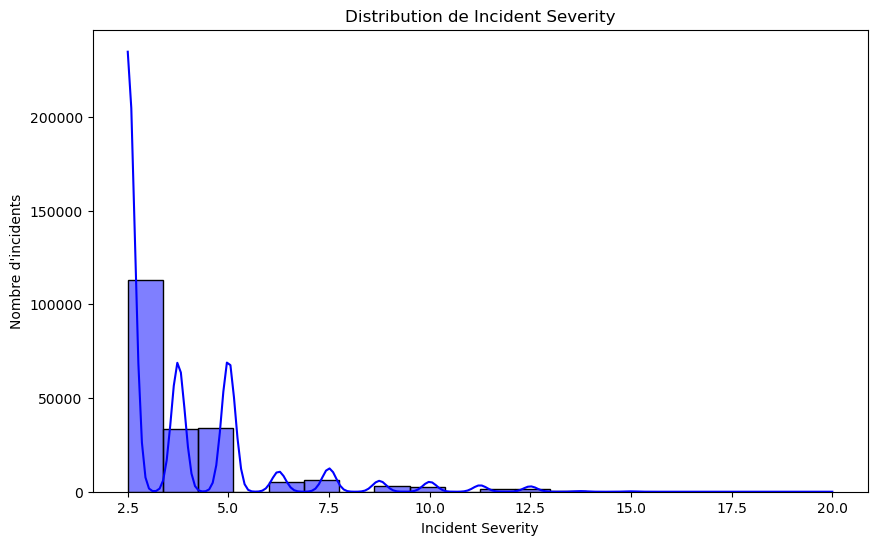

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df["IncidentSeverity"], bins=20, kde=True, color='blue')
plt.title("Distribution de Incident Severity")
plt.xlabel("Incident Severity")
plt.ylabel("Nombre d'incidents")
plt.show()

In [19]:
# Si 'DelayCode_Description' est non nul, cela veut dire qu'il y a un retard

df["HasDelay"] = df["DelayCode_Description"].notna().astype(int)

In [20]:
# Calculer la moyenne du temps de réponse pour chaque station
df["AvgResponseTimeByStation"] = df.groupby("DeployedFromStation_Name")["AttendanceTimeSeconds"].transform("mean")

# Calculer la densité des incidents par zone géographique
incident_density = df.groupby("Geo_zone")["IncidentNumber"].transform("count")
df["IncidentsDensityByZone"] = incident_density

In [21]:
# Calcul des coefficients basés sur la moyenne des temps de réponse par TimeOfDay
time_of_day_avg = df.groupby("TimeOfDay")["AttendanceTimeSeconds"].mean() 
global_avg_time = df["AttendanceTimeSeconds"].mean() 
df["TimeOfDayWeight"] = df["TimeOfDay"].map(time_of_day_avg / global_avg_time)

# Interaction entre TimeOfDay et DistanceToIncident_km basée sur des données réelles
df["DistanceTimeInteraction"] = df["DistanceToIncident_km"] * df["TimeOfDayWeight"]

# Calcul des coefficients pour Geo_zone basés sur le nombre moyen de camions mobilisés par zone
geo_zone_avg_pumps = df.groupby("Geo_zone")["NumPumpsAttending"].mean()
df["GeoZonePumpsInteraction"] = df["NumPumpsAttending"] * df["Geo_zone"].map(geo_zone_avg_pumps)

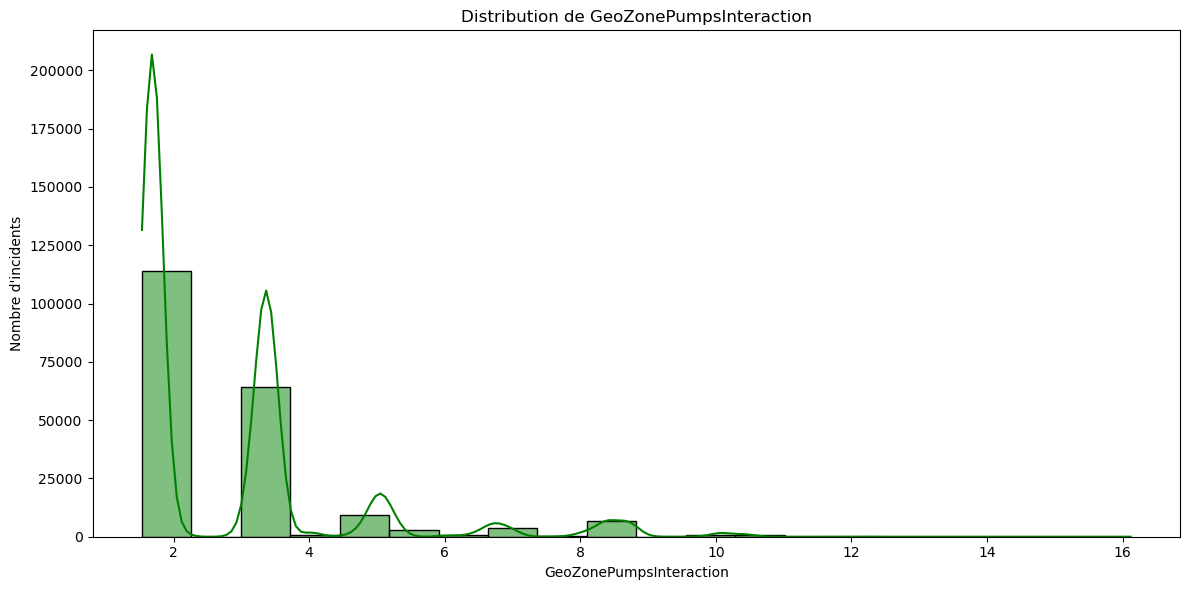

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))

#  Distribution de 'GeoZonePumpsInteraction'

sns.histplot(df["GeoZonePumpsInteraction"], bins=20, kde=True, ax=ax, color="green")
ax.set_title("Distribution de GeoZonePumpsInteraction")
ax.set_xlabel("GeoZonePumpsInteraction")
ax.set_ylabel("Nombre d'incidents")

plt.tight_layout()
plt.show()

In [22]:
# Différence entre le temps d'arrivée du premier et du deuxième camion
df["TimeDifference_FirstSecondPump"] = df["SecondPumpArriving_AttendanceTime"] - df["FirstPumpArriving_AttendanceTime"]

# Ratio entre le temps du deuxième et du premier camion 
df["Ratio_SecondToFirstPump"] = df["SecondPumpArriving_AttendanceTime"] / df["FirstPumpArriving_AttendanceTime"]
df["Ratio_SecondToFirstPump"] = df["Ratio_SecondToFirstPump"].replace([np.inf, -np.inf], np.nan)  # Remplacer les divisions par zéro par NaN

# Moyenne des temps d'arrivée du premier et du deuxième camion
df["MeanPumpArrivalTime"] = (df["FirstPumpArriving_AttendanceTime"] + df["SecondPumpArriving_AttendanceTime"]) / 2

# Indicateur binaire : est-ce qu'un deuxième camion est arrivé ?
df["SecondPumpArrived"] = df["SecondPumpArriving_AttendanceTime"].notna().astype(int)

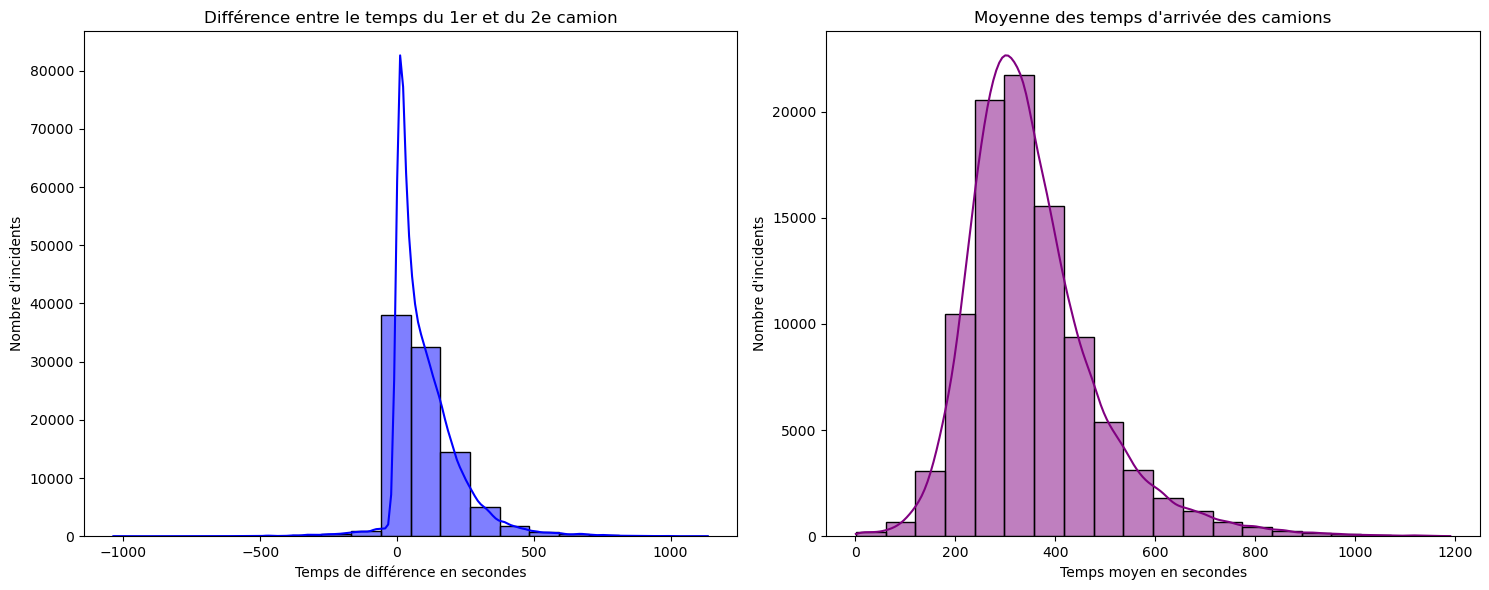

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#  Distribution de la différence entre le premier et le deuxième camion
sns.histplot(df["TimeDifference_FirstSecondPump"].dropna(), bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Différence entre le temps du 1er et du 2e camion")
axes[0].set_xlabel("Temps de différence en secondes")
axes[0].set_ylabel("Nombre d'incidents")

#  Distribution de la moyenne des temps d'arrivée des deux camions
sns.histplot(df["MeanPumpArrivalTime"].dropna(), bins=20, kde=True, ax=axes[1], color="purple")
axes[1].set_title("Moyenne des temps d\'arrivée des camions")
axes[1].set_xlabel("Temps moyen en secondes")
axes[1].set_ylabel("Nombre d'incidents")


plt.tight_layout()
plt.show()

In [23]:
# Remplacer les valeurs NaN dans 'SecondPumpArriving_DeployedFromStation' par "Pas de seconde pompe"
df["SecondPumpArriving_DeployedFromStation"].fillna("Pas de seconde pompe", inplace=True)

# Remplacer les valeurs NaN dans 'SecondPumpArriving_AttendanceTime' par "Pas de seconde pompe"
df["SecondPumpArriving_AttendanceTime"].fillna("Pas de seconde pompe", inplace=True)

# Gestion des outliers

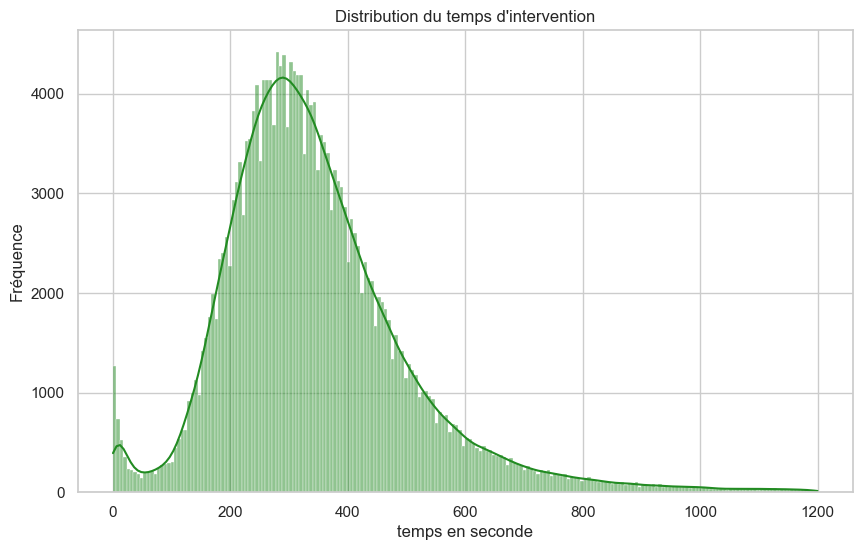

In [50]:
# distribution du temps d'intervention
sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df["AttendanceTimeSeconds"], color="forestgreen", kde=True)
plt.title("Distribution du temps d'intervention")
plt.xlabel('temps en seconde')
plt.ylabel('Fréquence')
plt.show()

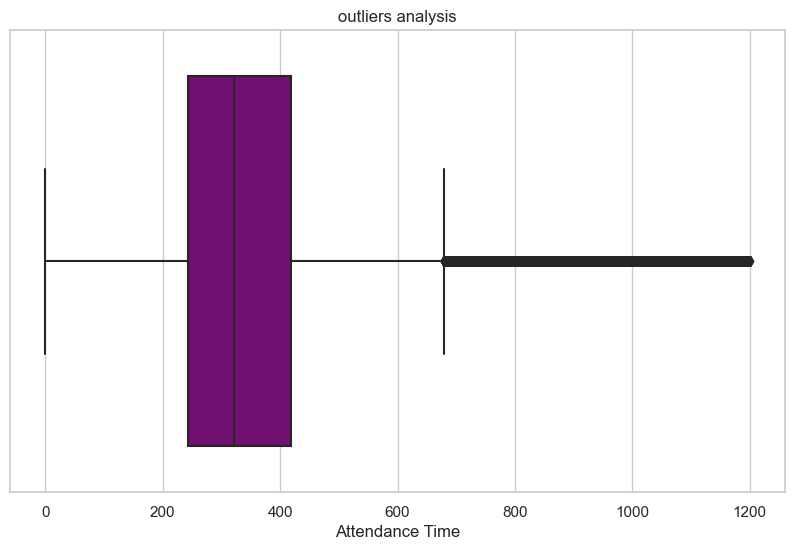

In [51]:
# boxplot "AttendanceTimeSeconds"
plt.figure(figsize=(10,6))
sns.boxplot(x=df["AttendanceTimeSeconds"], color='purple')
plt.title('outliers analysis')
plt.xlabel('Attendance Time')
plt.show()

## Outliers "AttendanceTimeSeconds"

In [24]:
# Définir IQR
Q1 = df["AttendanceTimeSeconds"].quantile(0.25)
print("Q1:",Q1)
Q3 = df["AttendanceTimeSeconds"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

# Définir les limites des outliers
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Suppression des outliers 
df_no_outliers = df[(df["AttendanceTimeSeconds"] >= limite_inf) & (df["AttendanceTimeSeconds"] <= limite_sup)]

# Vérification shape data avant et après suppression outliers
print("shape data avant suppression outliers :", df.shape)
print("shape data après suppression outliers :", df_no_outliers.shape)
print("nombre d'outilers supprimés :", (df.shape[0] - df_no_outliers.shape[0]))

Q1: 244.0
Q3: 418.0
IQR: 174.0
shape data avant suppression outliers : (217851, 84)
shape data après suppression outliers : (209690, 84)
nombre d'outilers supprimés : 8161


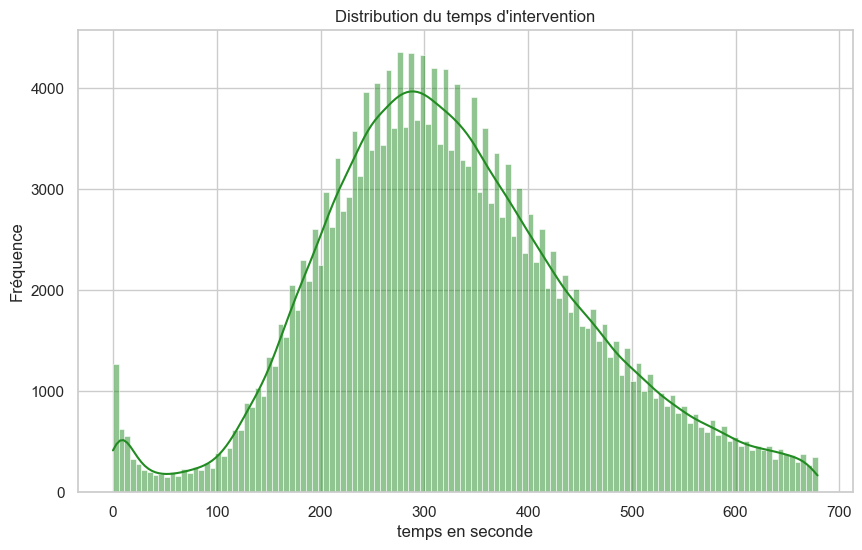

In [53]:
# distribution du temps d'intervention sans outliers

sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers["AttendanceTimeSeconds"], color="forestgreen", kde=True)
plt.title("Distribution du temps d'intervention")
plt.xlabel('temps en seconde')
plt.ylabel('Fréquence')
plt.show()

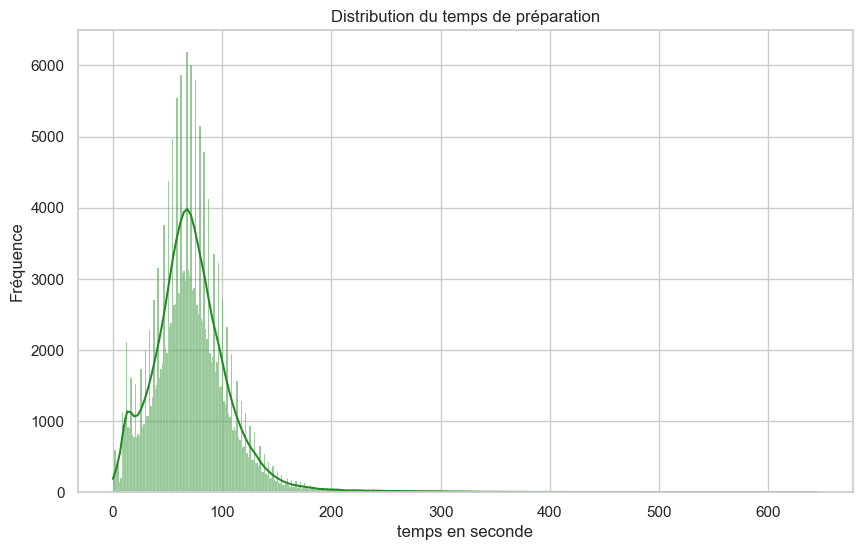

In [54]:
# distribution du temps de préparation (TurnoutTimeSeconds)

sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers["TurnoutTimeSeconds"], color="forestgreen", kde=True)
plt.title("Distribution du temps de préparation")
plt.xlabel('temps en seconde')
plt.ylabel('Fréquence')
plt.show()

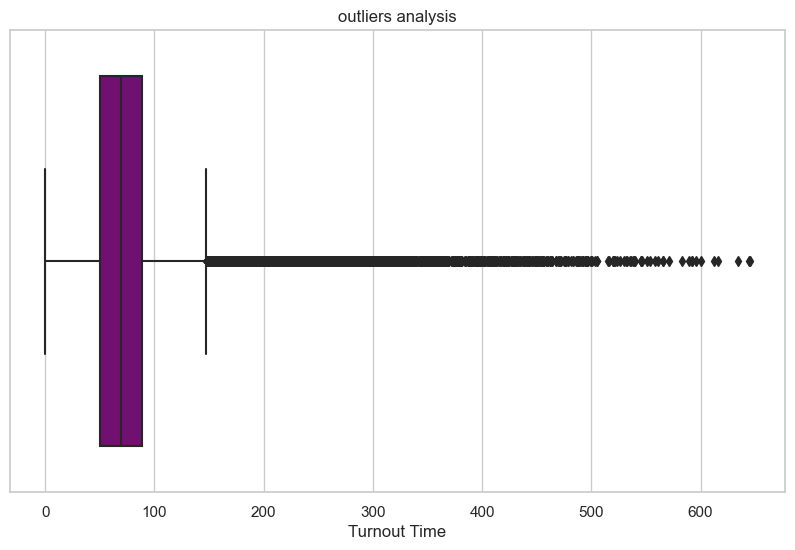

In [55]:
# boxplot "TurnoutTimeSconds"

plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers["TurnoutTimeSeconds"], color='purple')
plt.title('outliers analysis')
plt.xlabel('Turnout Time')
plt.show()


## Outliers "TurnoutTimeSeconds"

In [25]:
# Définir IQR
Q1 = df_no_outliers["TurnoutTimeSeconds"].quantile(0.25)
print("Q1:",Q1)
Q3 = df_no_outliers["TurnoutTimeSeconds"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

# Définir les limites des outliers
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Suppression des outliers 
df_no_outliers_2 = df_no_outliers[(df_no_outliers["TurnoutTimeSeconds"] >= limite_inf) & (df_no_outliers["TurnoutTimeSeconds"] <= limite_sup)]

# Vérification shape data avant et après suppression outliers
print("shape data avant suppression outliers :", df_no_outliers.shape)
print("shape data après suppression outliers :", df_no_outliers_2.shape)
print("nombre d'outilers supprimés :", (df_no_outliers.shape[0] - df_no_outliers_2.shape[0]))

Q1: 50.0
Q3: 89.0
IQR: 39.0
shape data avant suppression outliers : (209690, 84)
shape data après suppression outliers : (202361, 84)
nombre d'outilers supprimés : 7329


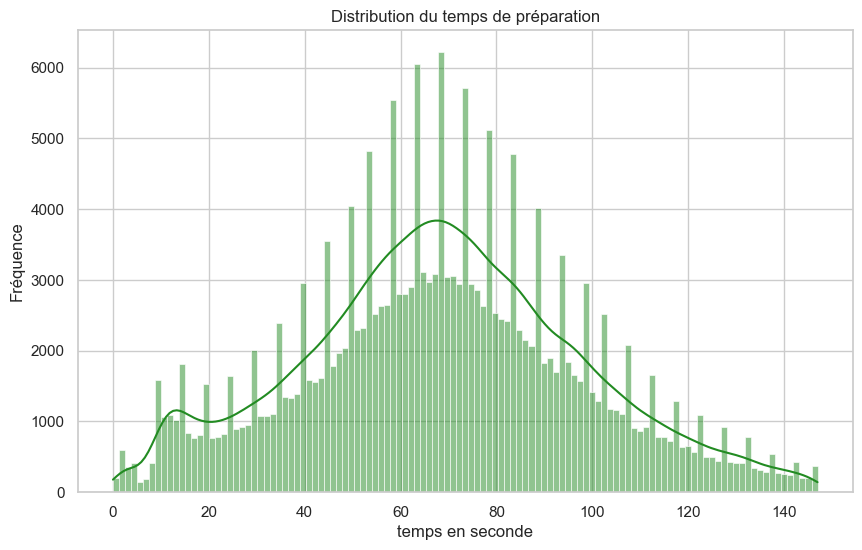

In [57]:
# distribution du temps de préparation sans outliers (TurnoutTimeSeconds)

sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers_2["TurnoutTimeSeconds"], color="forestgreen", kde=True)
plt.title("Distribution du temps de préparation")
plt.xlabel('temps en seconde')
plt.ylabel('Fréquence')
plt.show()

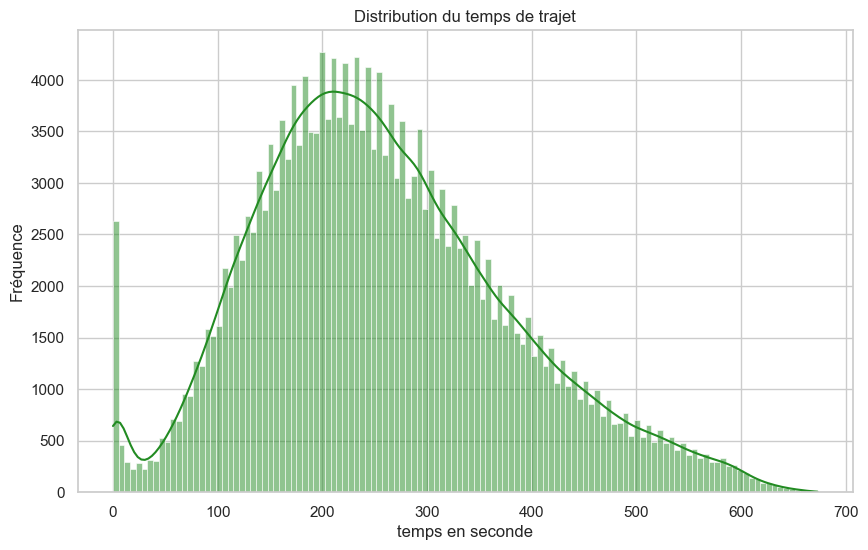

In [58]:
# distribution du temps de trajet (TravelTimeSeconds)

sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers_2["TravelTimeSeconds"], color="forestgreen", kde=True)
plt.title("Distribution du temps de trajet")
plt.xlabel('temps en seconde')
plt.ylabel('Fréquence')
plt.show()

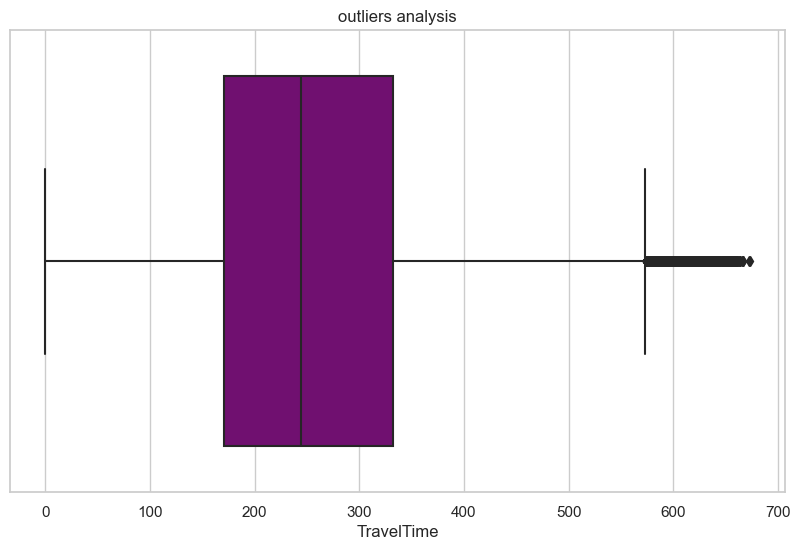

In [59]:
# boxplot "TravelTimeSeconds"

plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers_2["TravelTimeSeconds"], color='purple')
plt.title('outliers analysis')
plt.xlabel('TravelTime')
plt.show()


## Outliers "TravelTimeSeconds"

In [26]:
# Définir IQR
Q1 = df_no_outliers_2["TravelTimeSeconds"].quantile(0.25)
print("Q1:",Q1)
Q3 = df_no_outliers_2["TravelTimeSeconds"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

# Définir les limites des outliers
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Suppression des outliers 
df_no_outliers_3 = df_no_outliers_2[(df_no_outliers_2["TravelTimeSeconds"] >= limite_inf) & (df_no_outliers_2["TravelTimeSeconds"] <= limite_sup)]

# Vérification shape data avant et après suppression outliers
print("shape data avant suppression outliers :", df_no_outliers_2.shape)
print("shape data après suppression outliers :", df_no_outliers_3.shape)
print("nombre d'outilers supprimés :", (df_no_outliers_2.shape[0] - df_no_outliers_3.shape[0]))

Q1: 171.0
Q3: 332.0
IQR: 161.0
shape data avant suppression outliers : (202361, 84)
shape data après suppression outliers : (200068, 84)
nombre d'outilers supprimés : 2293


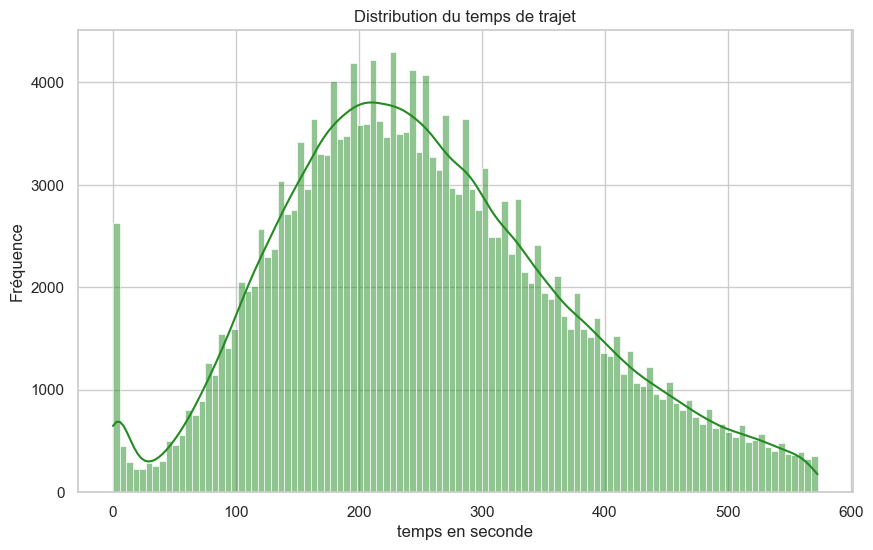

In [61]:
# distribution du temps de trajet sans outliers (TravelTimeSeconds)

sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers_3["TravelTimeSeconds"], color="forestgreen", kde=True)
plt.title("Distribution du temps de trajet")
plt.xlabel('temps en seconde')
plt.ylabel('Fréquence')
plt.show()

In [27]:
df = df_no_outliers_3

# DATAVIZ

1. Analyse des temps de mobilisation, de déplacement et d'intervention : "TurnoutTimeSeconds", "TravelTimeSeconds" et "AttendanceTimeSeconds"
2. Facteurs géographiques: "IncGeo_BoroughName", "IncGeo_WardName", "Latitude", et "Longitude"
3. Ressources mobilisés et stations de déploiement: "DeployedFromStation_Name", "PumpOrder", et "NumPumpsAttending"
4. Temps d'appel et d'arrivée: "DateAndTimeMobilised", "DateAndTimeMobile", "DateAndTimeArrived", et "DateAndTimeLeft"
5. Motifs de retard et retards : "DelayCodeId" et "DelayCode_Description"
6. 
Viz : 
1. Boxplot temps d'intervention par région : voir la distrib des temps d'intervention par zone
2. Heatmap des temps de déplacement: temps de déplacement moyen par zone
3. histogramme des temps de mobilisation de deplacement et d'intervention : distribution des temps
4. scatterplot des temps d'intervention par nombre de pompes déployées : comment le nombre de ressources affectent le temps d'intervention
5. Un histogramme pour visualiser les motifs les plus fréquent justifiant les retards

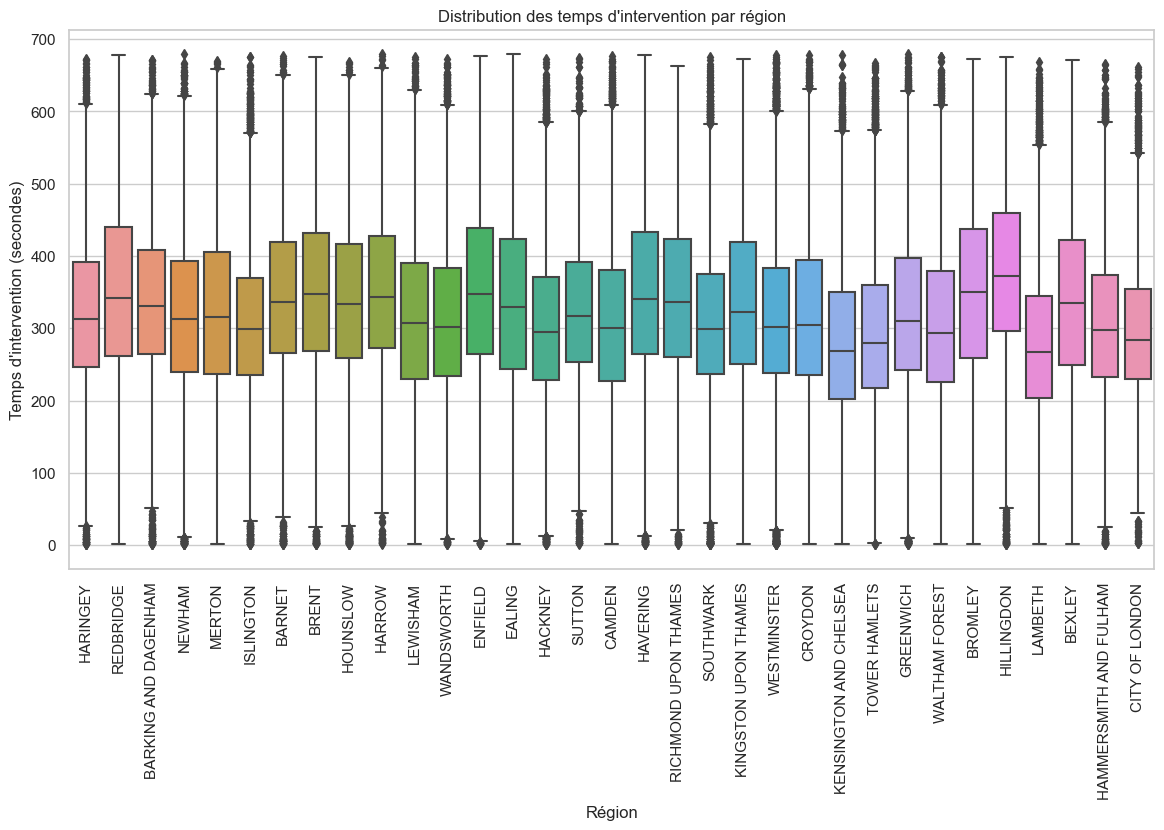

In [63]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="IncGeo_BoroughName", y="AttendanceTimeSeconds")
plt.xticks(rotation=90)
plt.title("Distribution des temps d\'intervention par région")
plt.xlabel("Région")
plt.ylabel("Temps d\'intervention (secondes)")
plt.show()

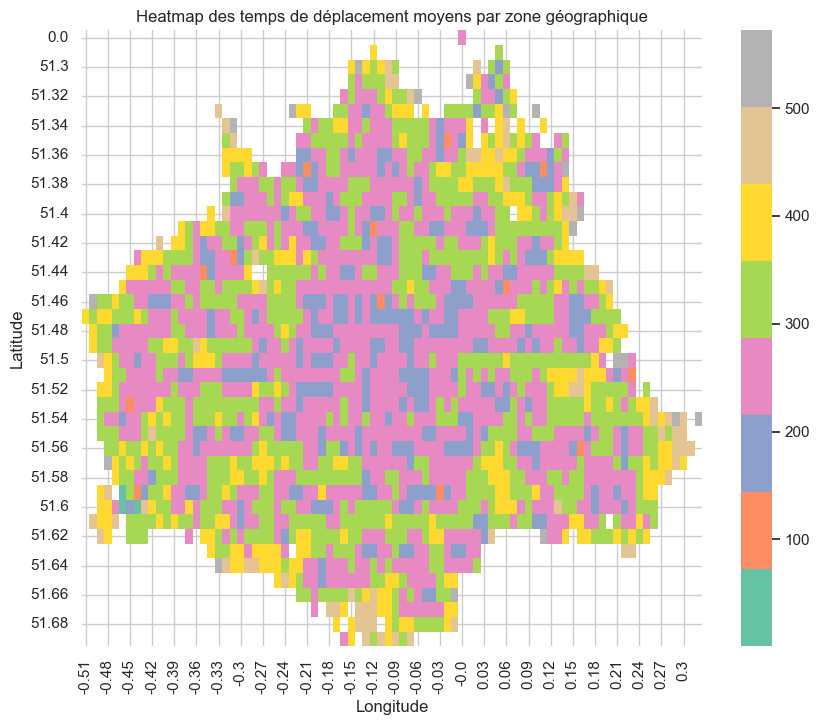

In [64]:
#Heatmap des temps de déplacement moyens par zone géographique
# Arrondir les coordonnées pour réduire le nombre de combinaisons uniques
df["Latitude_incident_rounded"] = df["Latitude_incident"].round(2)
df["Longitude_incident_rounded"] = df["Longitude_incident"].round(2)

plt.figure(figsize=(10, 8))
geo_travel_times = df.groupby(["Latitude_incident_rounded", "Longitude_incident_rounded"])["TravelTimeSeconds"].mean().reset_index()
geo_travel_times_pivot = geo_travel_times.pivot(index="Latitude_incident_rounded", columns="Longitude_incident_rounded", values="TravelTimeSeconds")
sns.heatmap(geo_travel_times_pivot, cmap="Set2")
plt.title("Heatmap des temps de déplacement moyens par zone géographique")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

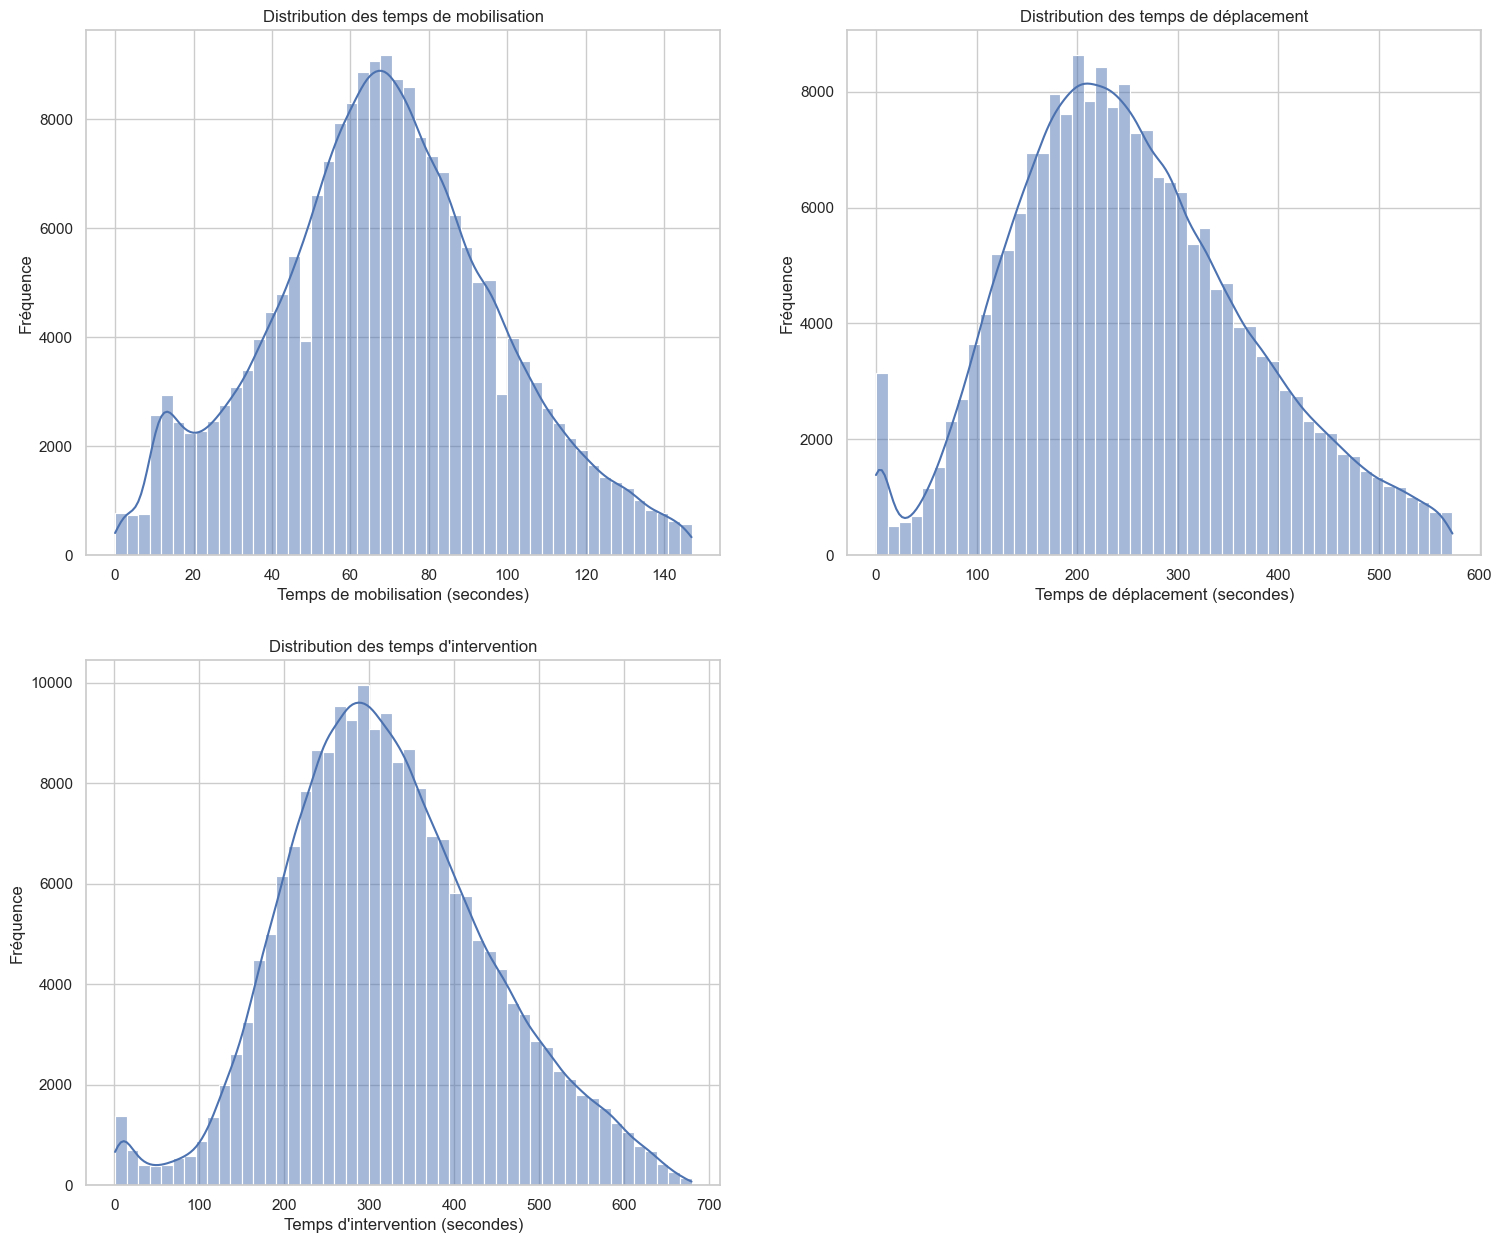

In [65]:
#Histogrammes des temps de mobilisation, de déplacement et d'intervention
plt.figure(figsize=(18, 15))

plt.subplot(2, 2, 1)
sns.histplot(df["TurnoutTimeSeconds"], bins=50, kde=True)
plt.title("Distribution des temps de mobilisation")
plt.xlabel("Temps de mobilisation (secondes)")
plt.ylabel("Fréquence")

plt.subplot(2, 2, 2)
sns.histplot(df["TravelTimeSeconds"], bins=50, kde=True)
plt.title("Distribution des temps de déplacement")
plt.xlabel("Temps de déplacement (secondes)")
plt.ylabel("Fréquence")

plt.subplot(2, 2, 3)
sns.histplot(df["AttendanceTimeSeconds"], bins=50, kde=True)
plt.title("Distribution des temps d'intervention")
plt.xlabel("Temps d'intervention (secondes)")
plt.ylabel("Fréquence")


plt.show()

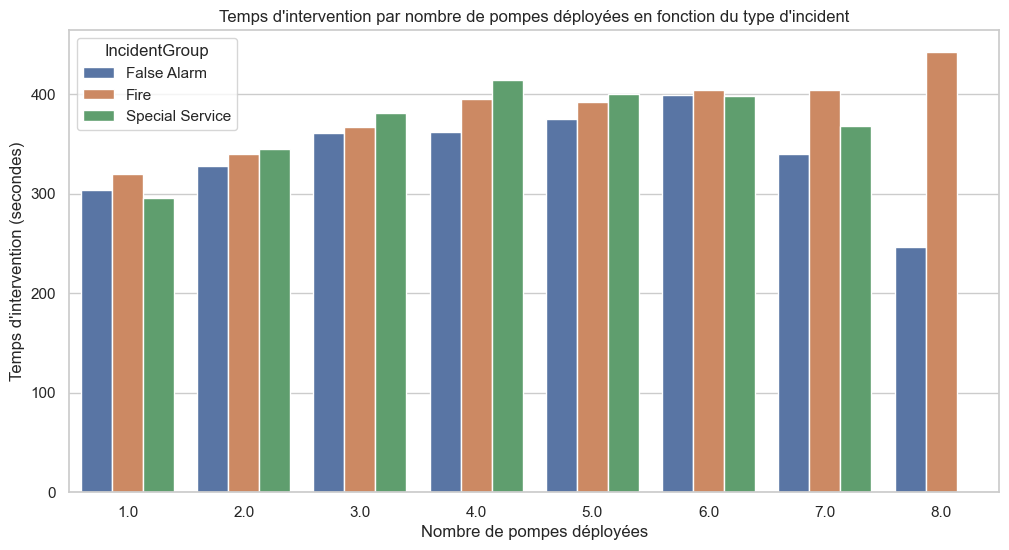

In [66]:
#Histplot du temps d'intervention par nombre de pompes dépolyées selon le type d'incident
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="NumPumpsAttending", y="AttendanceTimeSeconds",hue ="IncidentGroup", errorbar=None)
plt.title("Temps d'intervention par nombre de pompes déployées en fonction du type d'incident")
plt.xlabel("Nombre de pompes déployées")
plt.ylabel("Temps d'intervention (secondes)")
plt.show()

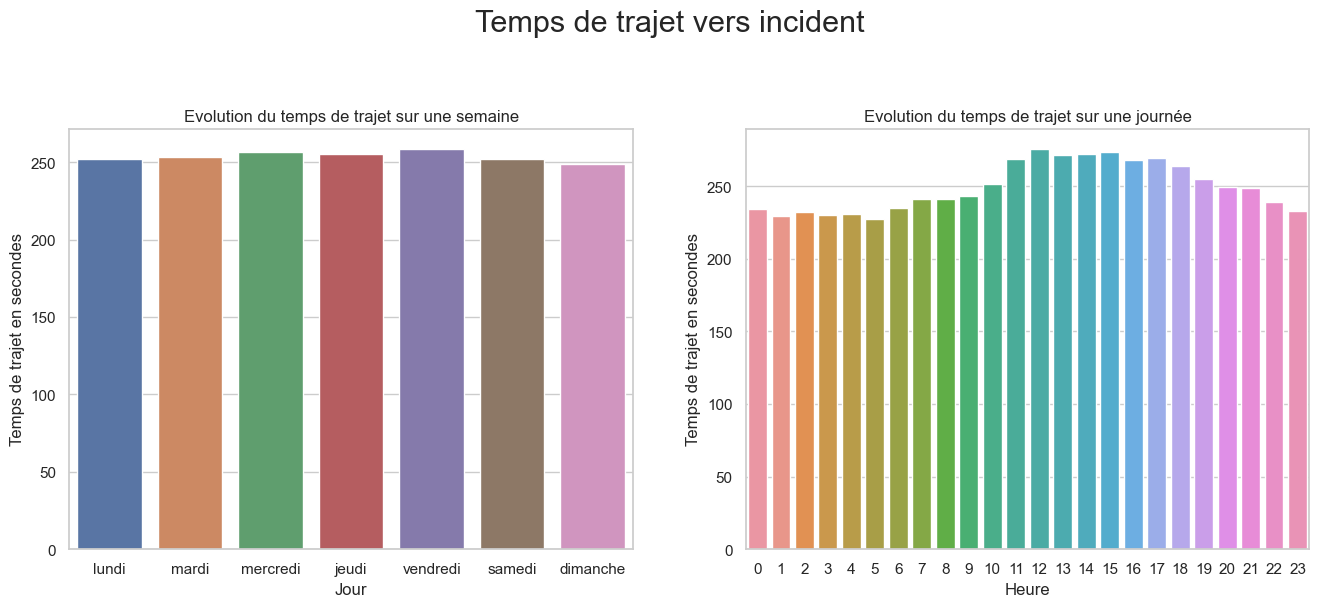

In [67]:
df["Weekday_mobilised"] = df["DateAndTimeMobilised"].dt.weekday

plt.figure(figsize = (16,12))
plt.suptitle('Temps de trajet vers incident', fontsize=22)
plt.subplot(221)
sns.barplot(x = 'Weekday_mobilised', y = 'TravelTimeSeconds', data = df.groupby(['Weekday_mobilised'])['TravelTimeSeconds'].mean().reset_index())
plt.xticks([0, 1, 2, 3,4,5,6], ['lundi','mardi','mercredi','jeudi', 'vendredi', 'samedi', 'dimanche'])
plt.title('Evolution du temps de trajet sur une semaine')
plt.ylabel('Temps de trajet en secondes')
plt.xlabel('Jour')

#,order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.subplot(222)
sns.barplot(x = 'HourOfCall', y = 'TravelTimeSeconds', data = df.groupby(['HourOfCall'])['TravelTimeSeconds'].mean().reset_index())
plt.title('Evolution du temps de trajet sur une journée')
plt.xlabel('Heure')
plt.ylabel('Temps de trajet en secondes');

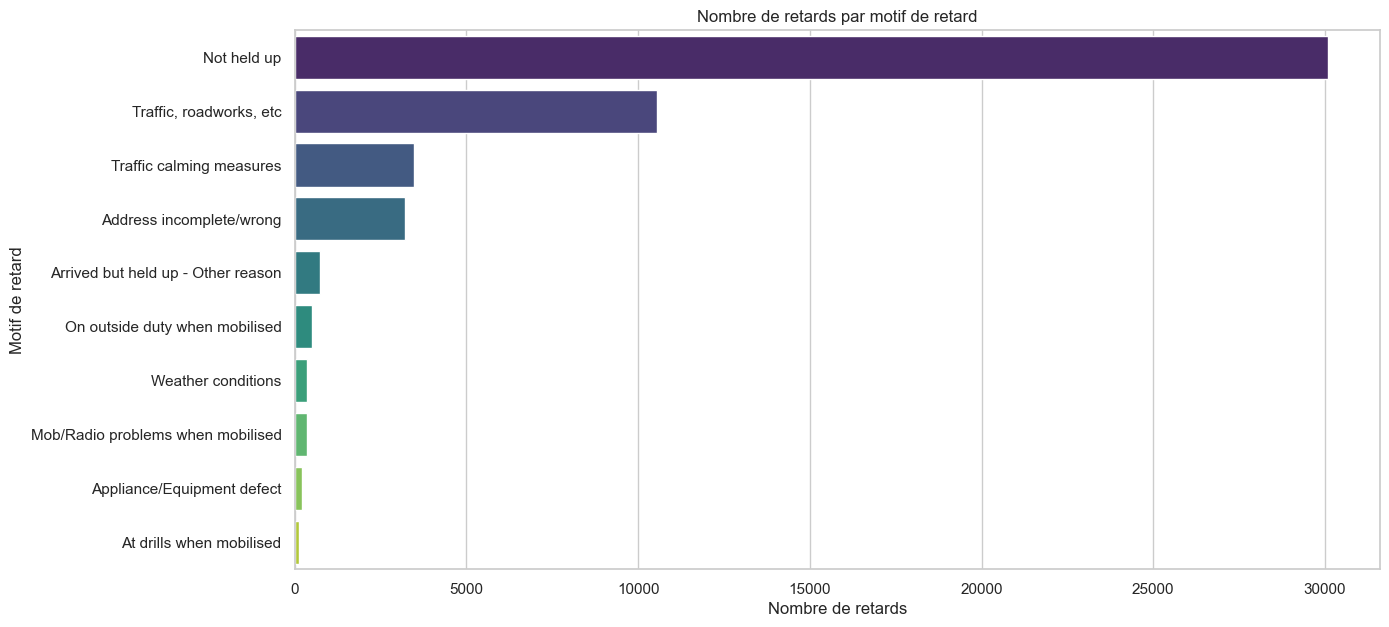

In [68]:
# Histogramme des retards et leurs motifs
delay_data = df[df["DelayCodeId"].notna()]

# nombre de retards pour chaque motif
delay_counts = delay_data["DelayCode_Description"].value_counts().reset_index()
delay_counts.columns = ["DelayCode_Description", "Count"]

# Graphique en barres des retards par motif
plt.figure(figsize=(14, 7))
sns.barplot(data=delay_counts, x="Count", y="DelayCode_Description", palette="viridis")
plt.title("Nombre de retards par motif de retard")
plt.xlabel("Nombre de retards")
plt.ylabel("Motif de retard")
plt.show()

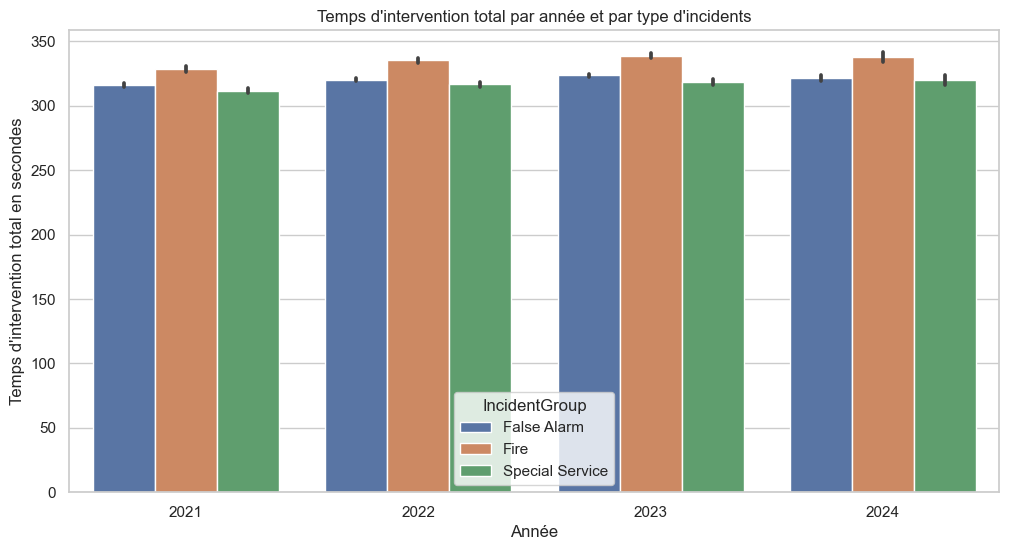

In [69]:
plt.figure(figsize=(12,6))

sns.barplot(x = "CalYear", y ="AttendanceTimeSeconds", hue = "IncidentGroup", data = df)
                      
plt.xlabel("Année")
plt.ylabel("Temps d'intervention total en secondes")
plt.title("Temps d'intervention total par année et par type d'incidents")

plt.show()

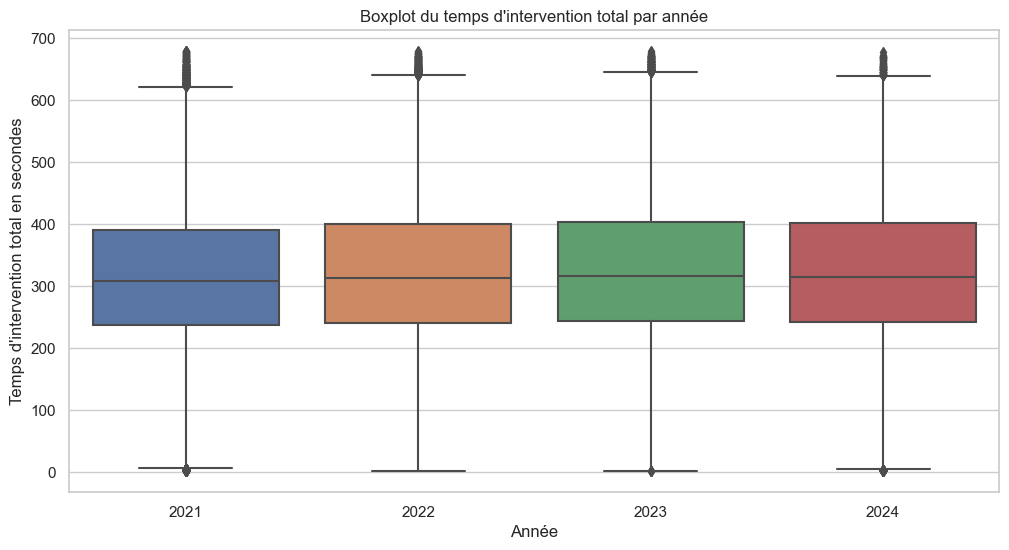

In [70]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "CalYear", y ="AttendanceTimeSeconds", data = df)
                      
plt.xlabel("Année")
plt.ylabel("Temps d'intervention total en secondes")
plt.title("Boxplot du temps d'intervention total par année")

plt.show()

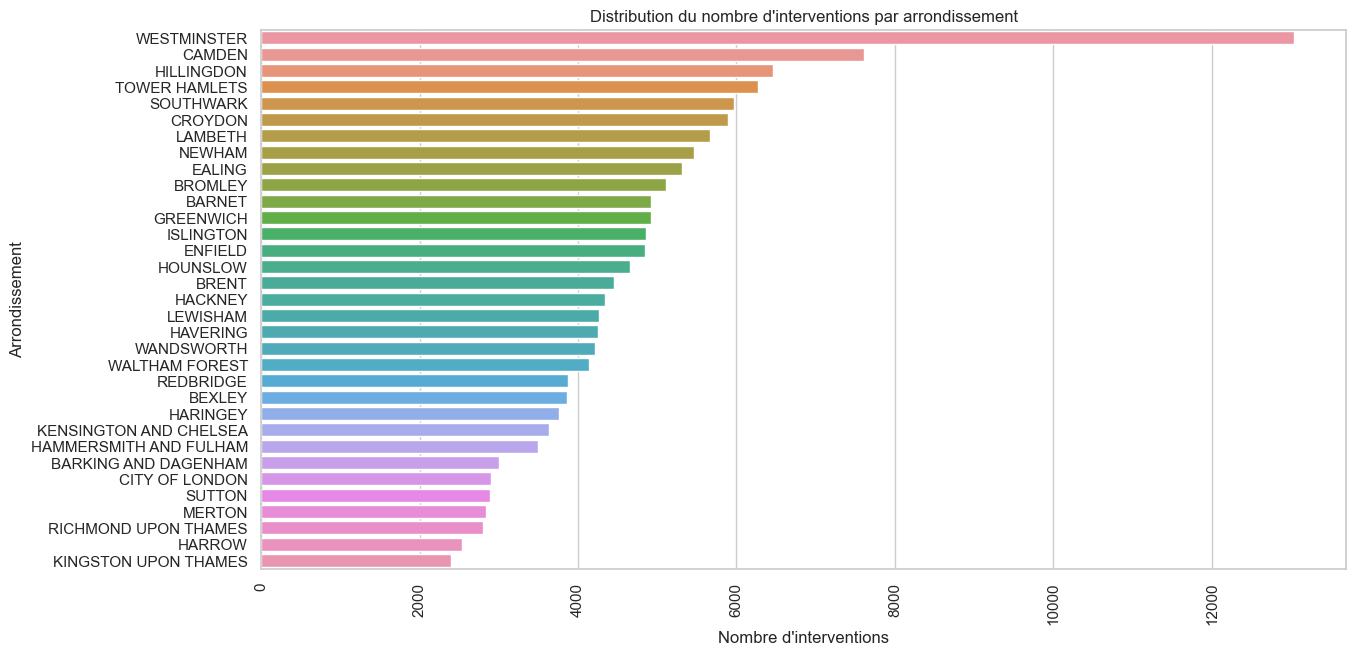

In [71]:
df_unique_incidents = df.drop_duplicates(subset=['IncidentNumber'])

plt.figure(figsize=(14, 7))

sns.countplot(data=df_unique_incidents, y='IncGeo_BoroughName', order = df_unique_incidents['IncGeo_BoroughName'].value_counts().index)

plt.xticks(rotation=90)
plt.xlabel("Nombre d'interventions")
plt.ylabel("Arrondissement")
plt.title("Distribution du nombre d'interventions par arrondissement")

plt.show()

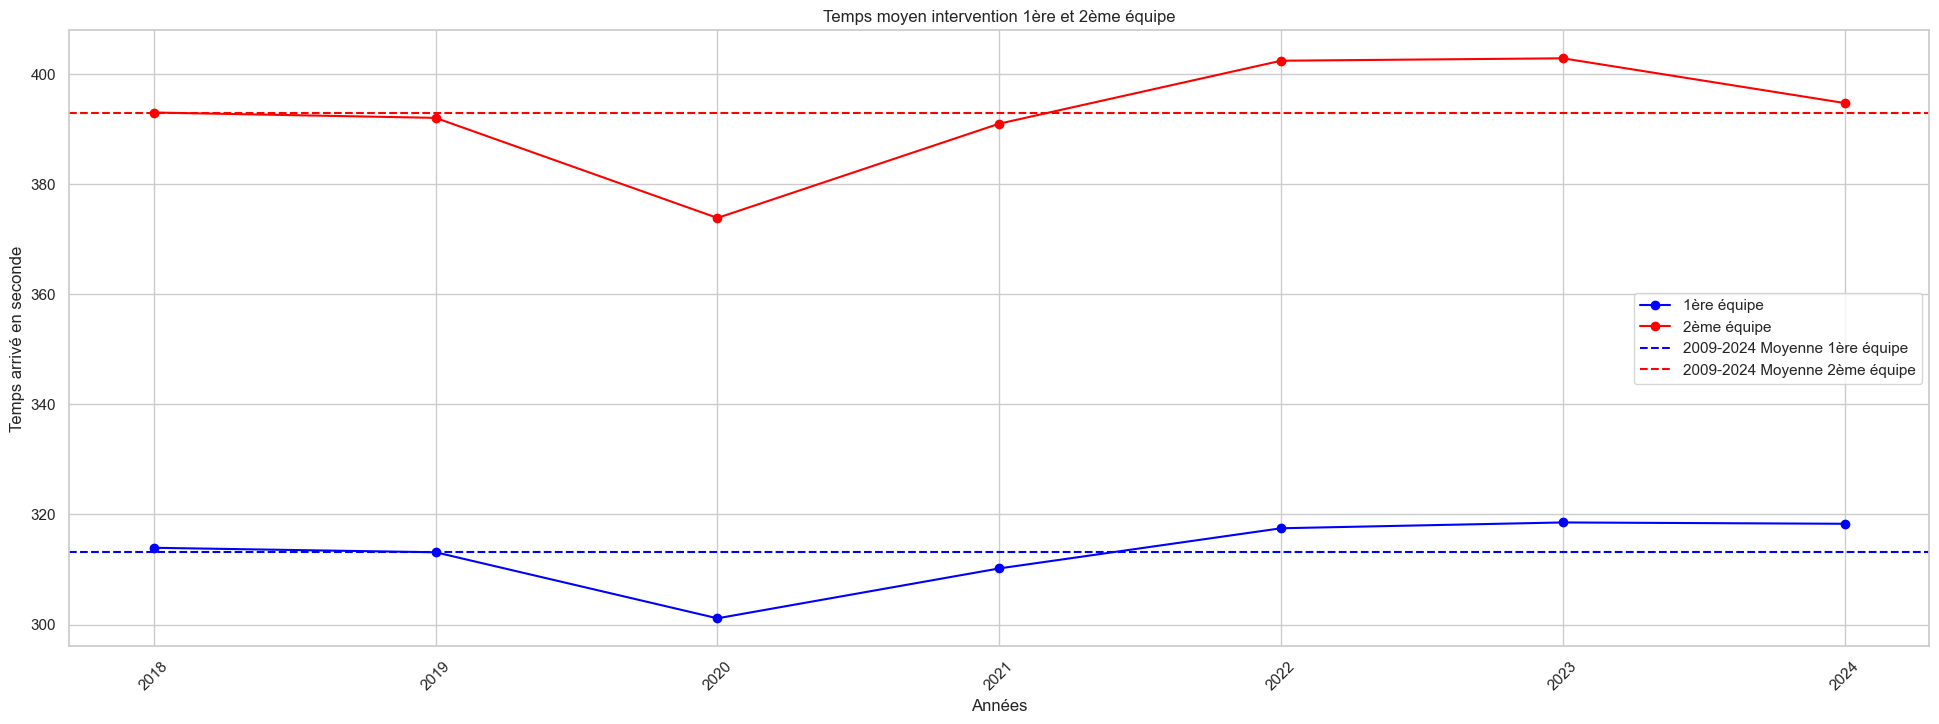

In [72]:
average_FirstPump = incident_2018_onwards.groupby('CalYear')['FirstPumpArriving_AttendanceTime'].mean()
average_SecondPump = incident_2018_onwards.groupby('CalYear')['SecondPumpArriving_AttendanceTime'].mean()

plt.figure(figsize=(24, 8))
plt.plot(average_FirstPump.index, average_FirstPump.values, color = 'blue', marker='o', linestyle='-', label = '1ère équipe')
plt.plot(average_SecondPump.index, average_SecondPump.values, color = 'red', marker='o', linestyle='-', label = '2ème équipe')

# labels and title
plt.xlabel('Années')
plt.ylabel('Temps arrivé en seconde')
plt.title('Temps moyen intervention 1ère et 2ème équipe')

# Ligne de référence de la moyenne 
plt.axhline(y=average_FirstPump.mean(), color='blue', linestyle='--', label='2009-2024 Moyenne 1ère équipe')
plt.axhline(y=average_SecondPump.mean(), color='red', linestyle='--', label='2009-2024 Moyenne 2ème équipe')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

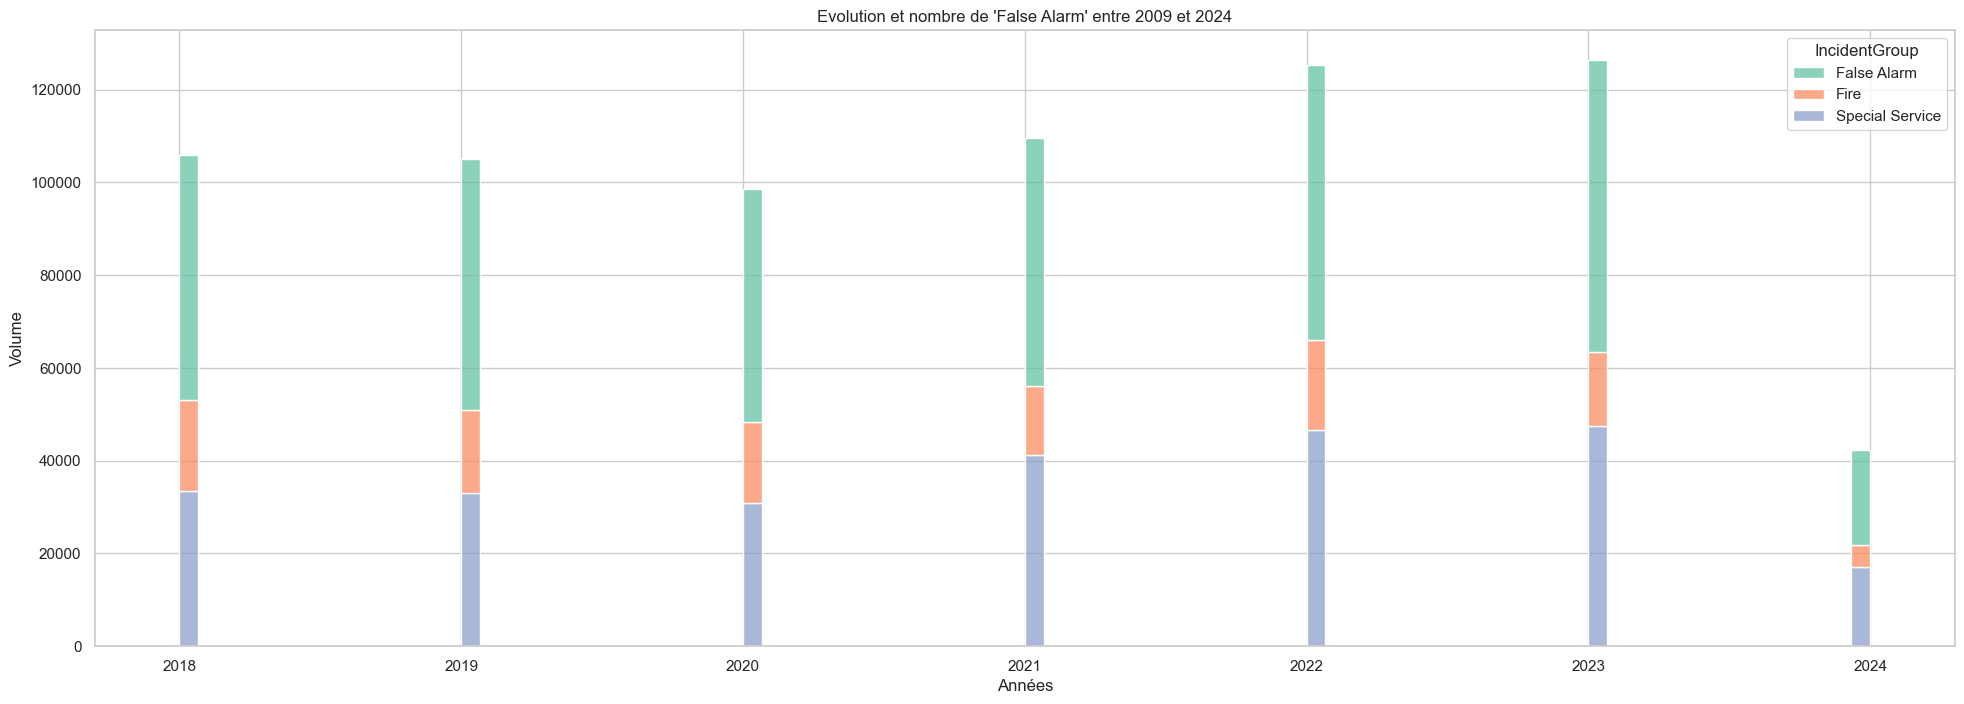

In [73]:
plt.figure(figsize=(24, 8))

sns.set_style("whitegrid")
sns.histplot(
    data=incident_2018_onwards,
    x="CalYear",
    hue="IncidentGroup",
    multiple="stack",
    stat="count",  
    palette="Set2", )

plt.xlabel('Années')
plt.ylabel('Volume')
plt.title("Evolution et nombre de 'False Alarm' entre 2009 et 2024")

plt.show()

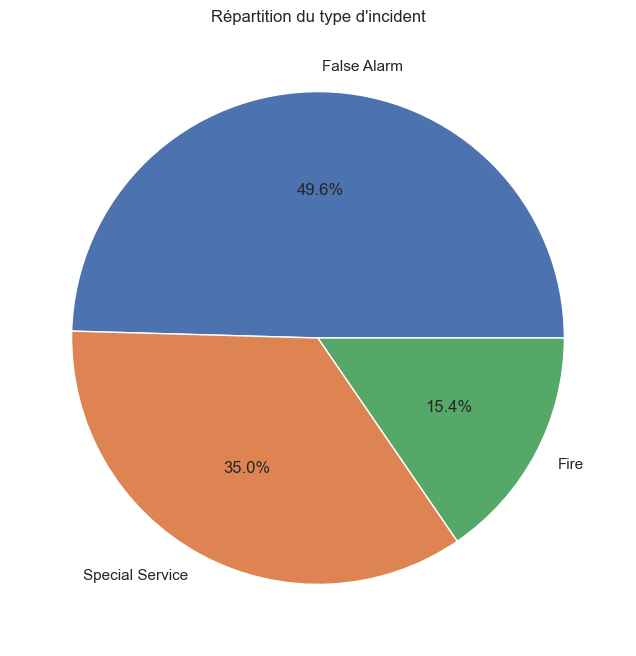

In [74]:
plt.figure(figsize=(12, 8)) 

plt.pie(incident_2018_onwards.IncidentGroup.value_counts().values, labels=incident_2018_onwards.IncidentGroup.value_counts().index, autopct="%1.1f%%", labeldistance = 1.1)  # Display percentage with one decimal place
plt.title("Répartition du type d'incident") 

plt.show()

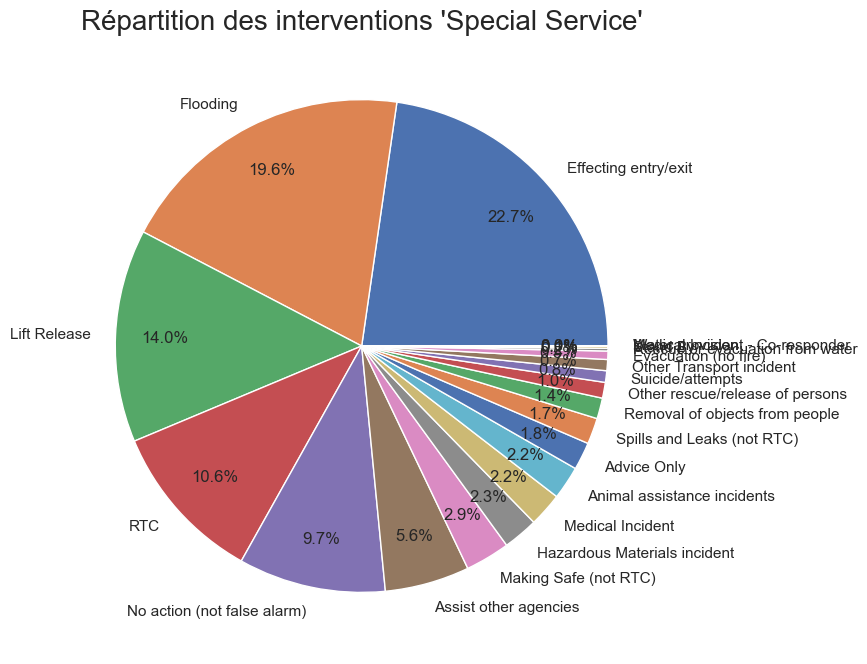

In [75]:
Special_Service = incident_2018_onwards[incident_2018_onwards['IncidentGroup'] == 'Special Service']

plt.figure(figsize=(12, 8))
plt.pie(Special_Service.SpecialServiceType.value_counts().values, labels=Special_Service.SpecialServiceType.value_counts().index, autopct="%1.1f%%", pctdistance=0.8)

plt.title("Répartition des interventions 'Special Service'", fontsize=20)



plt.show()

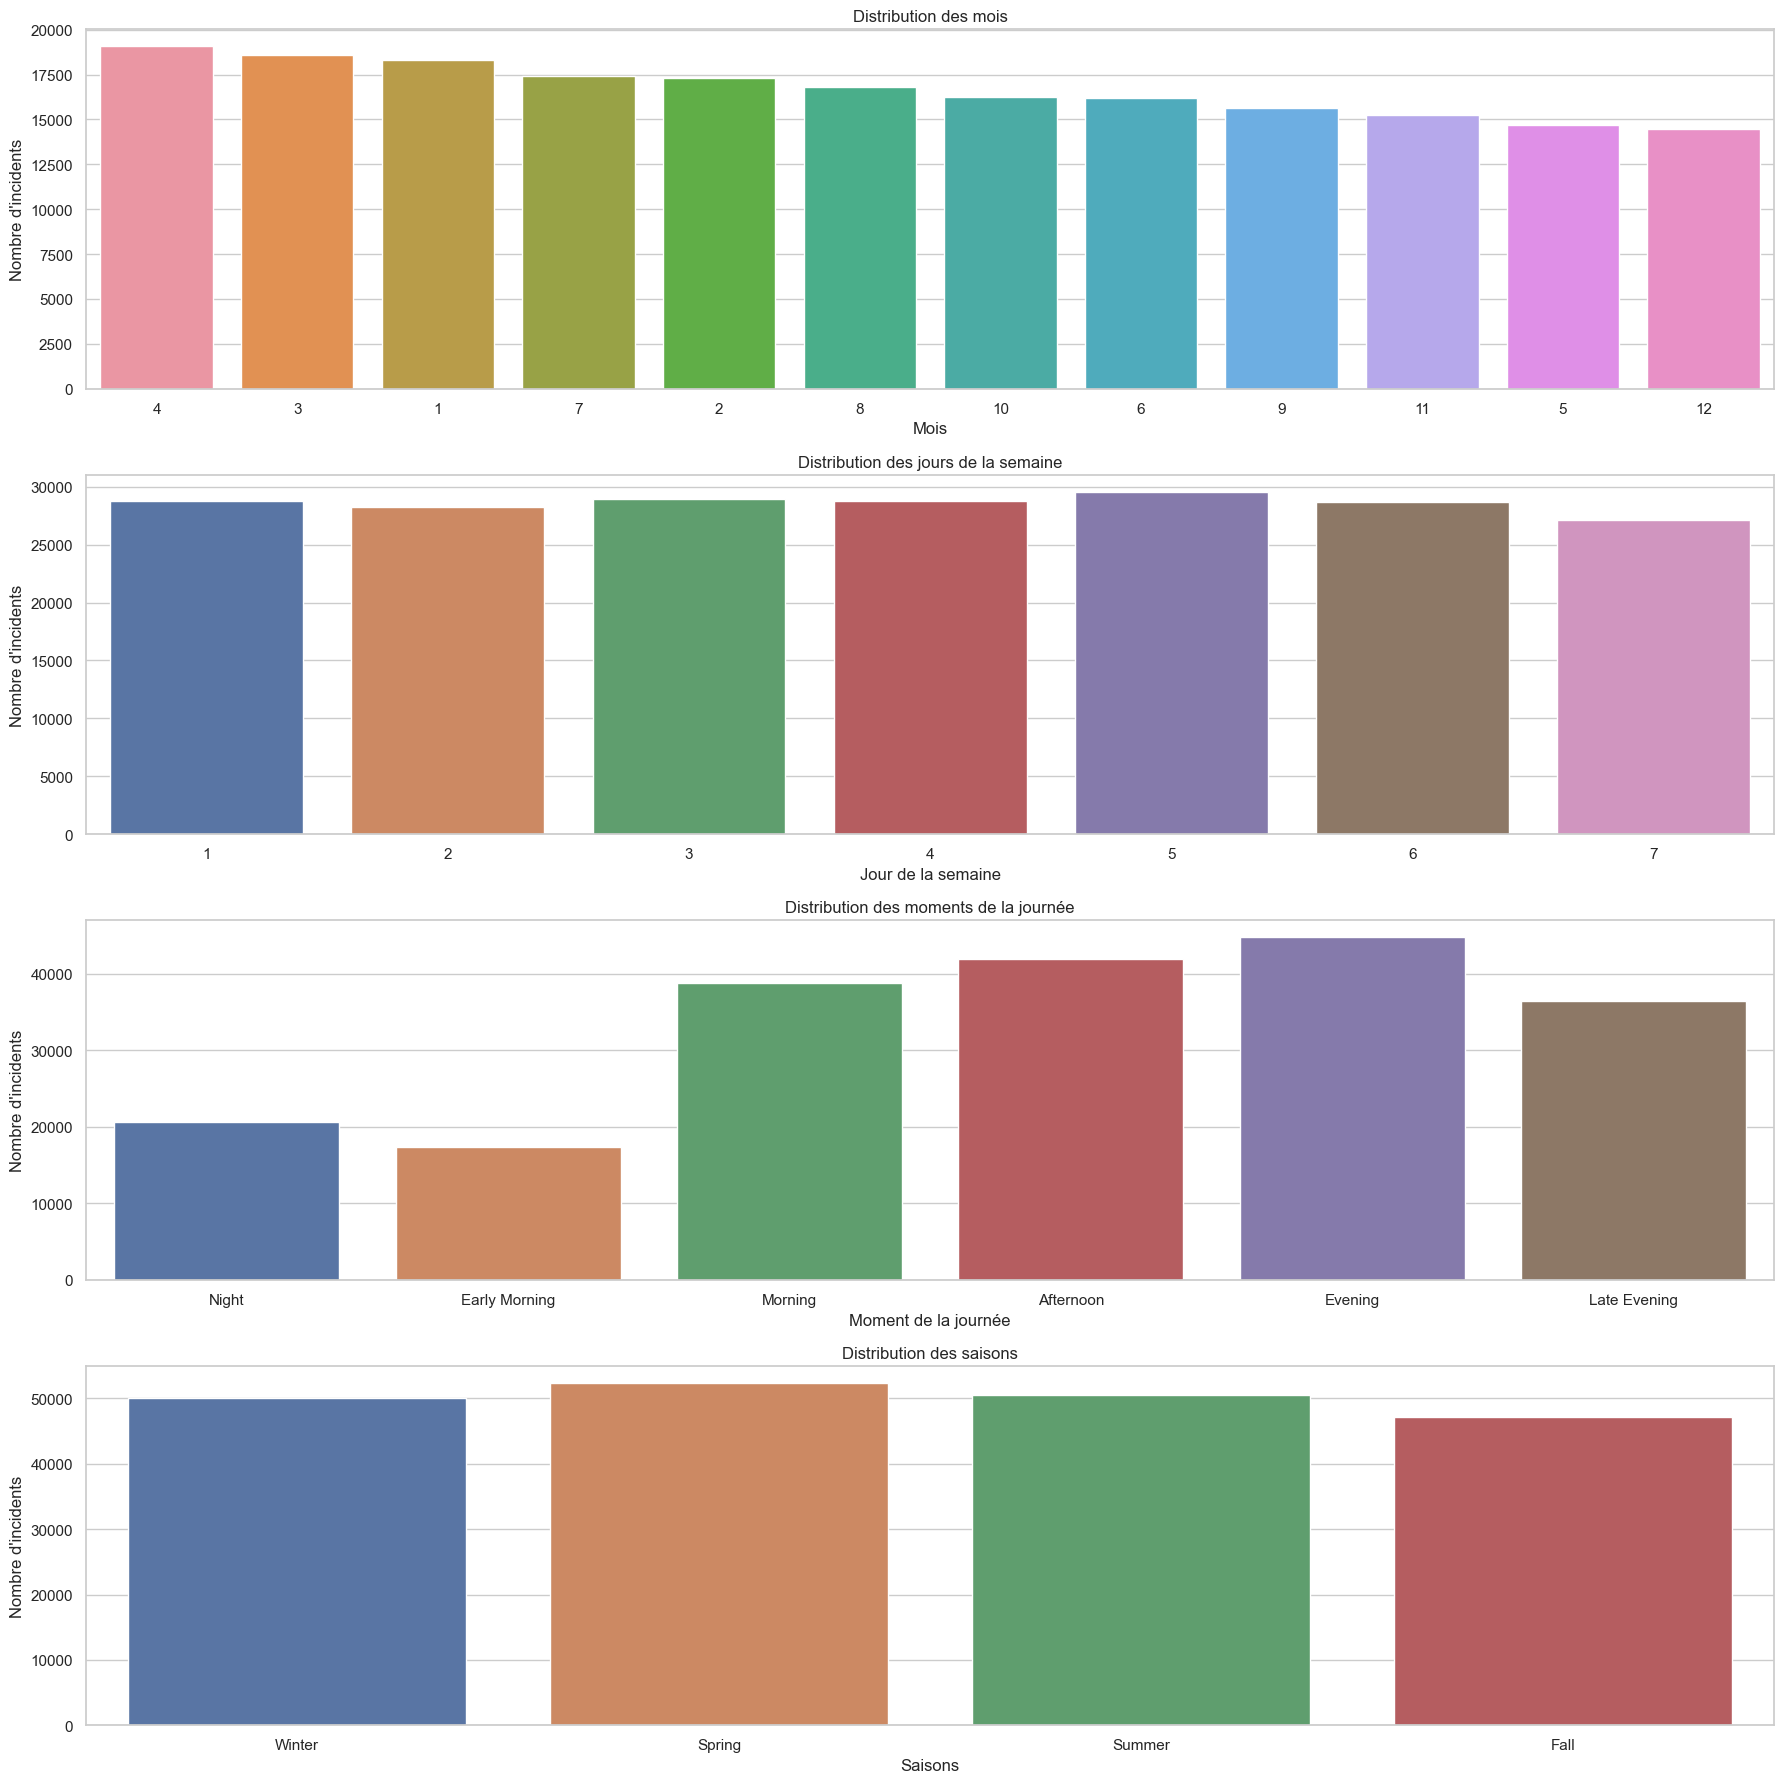

In [77]:
fig, axes = plt.subplots(4, 1, figsize=(18, 18))

# Distribution des mois
sns.countplot(ax=axes[0], x="Month", data=df, order=df["Month"].value_counts().index)
axes[0].set_title("Distribution des mois")
axes[0].set_ylabel("Nombre d'incidents")
axes[0].set_xlabel("Mois")

# Distribution des jours de la semaine
sns.countplot(ax=axes[1], x="DayOfWeek", data=df, order=[1, 2, 3, 4, 5, 6 ,7], label=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
axes[1].set_title("Distribution des jours de la semaine")
axes[1].set_ylabel("Nombre d'incidents")
axes[1].set_xlabel("Jour de la semaine")

# Distribution des moments de la journée
sns.countplot(ax=axes[2], x="TimeOfDay", data=df, order=["Night","Early Morning","Morning", "Afternoon", "Evening","Late Evening"])
axes[2].set_title("Distribution des moments de la journée")
axes[2].set_ylabel("Nombre d'incidents")
axes[2].set_xlabel("Moment de la journée")

# Distribution des saisons
sns.countplot(ax=axes[3], x="Season", data=df, order=["Winter", "Spring", "Summer", "Fall"])
axes[3].set_title("Distribution des saisons")
axes[3].set_ylabel("Nombre d'incidents")
axes[3].set_xlabel("Saisons")

plt.tight_layout()
plt.show()

In [117]:
# Si tu veux enregistrer le DataFrame df dans un fichier CSV
df.to_excel('DF_Pompier.xlsx', index=False)

# Selections des variables explicatives

In [31]:
lfb = df[["CalYear", "Geo_zone", "Categ_geo", 
    "Latitude_incident", "Longitude_incident", 
    "DistanceToIncident_km", "Latitude_station_deploy", 
    "Longitude_station_deploy", "NumPumpsAttending", 
    "PumpOrder", "PumpCount", 
    "FirstPumpArriving_DeployedFromStation", "FirstPumpArriving_AttendanceTime",
    "SecondPumpArriving_AttendanceTime", "SecondPumpArriving_DeployedFromStation", 
    "IncidentSeverity", "IncidentsDensityByZone", 
    "HasDelay", "GeoZonePumpsInteraction", 
    "DelayCode_Description", "NumStationsWithPumpsAttending", 
    "SpecialServiceType", "Easting_m", "Northing_m", 
    "IncidentGroup", "PropertyType", 
    "Easting_rounded", "Northing_rounded", 
    "IncidentStationGround", "StopCodeDescription", 
    "PlusCode_Description", "DelayCodeId", 
    "PropertyCategory", "AddressQualifier", 
    "AvgResponseTimeByStation", "DistanceTimeInteraction", 
    "AttendanceTimeSeconds",
    "HourOfCall_sin", "HourOfCall_cos", 
    "DayOfWeek_sin", "DayOfWeek_cos",
    "Month_sin", "Month_cos","TimeOfDay"]]

lfb =pd.DataFrame(lfb)

In [79]:
lfb.columns

Index(['CalYear', 'Geo_zone', 'Categ_geo', 'Latitude_incident',
       'Longitude_incident', 'DistanceToIncident_km',
       'Latitude_station_deploy', 'Longitude_station_deploy',
       'NumPumpsAttending', 'PumpOrder', 'PumpCount',
       'FirstPumpArriving_DeployedFromStation',
       'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation', 'IncidentSeverity',
       'IncidentsDensityByZone', 'HasDelay', 'GeoZonePumpsInteraction',
       'DelayCode_Description', 'NumStationsWithPumpsAttending',
       'SpecialServiceType', 'Easting_m', 'Northing_m', 'IncidentGroup',
       'PropertyType', 'Easting_rounded', 'Northing_rounded',
       'IncidentStationGround', 'StopCodeDescription', 'PlusCode_Description',
       'DelayCodeId', 'PropertyCategory', 'AddressQualifier',
       'AvgResponseTimeByStation', 'DistanceTimeInteraction',
       'AttendanceTimeSeconds', 'HourOfCall_sin', 'HourOfCall_cos',
       'DayOfWeek_sin', 'D

In [80]:
lfb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200068 entries, 0 to 585566
Data columns (total 44 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CalYear                                 200068 non-null  int64  
 1   Geo_zone                                188180 non-null  object 
 2   Categ_geo                               188180 non-null  object 
 3   Latitude_incident                       200068 non-null  float64
 4   Longitude_incident                      200068 non-null  float64
 5   DistanceToIncident_km                   188180 non-null  float64
 6   Latitude_station_deploy                 188180 non-null  float64
 7   Longitude_station_deploy                188180 non-null  float64
 8   NumPumpsAttending                       200068 non-null  float64
 9   PumpOrder                               200068 non-null  int64  
 10  PumpCount                               200068 no

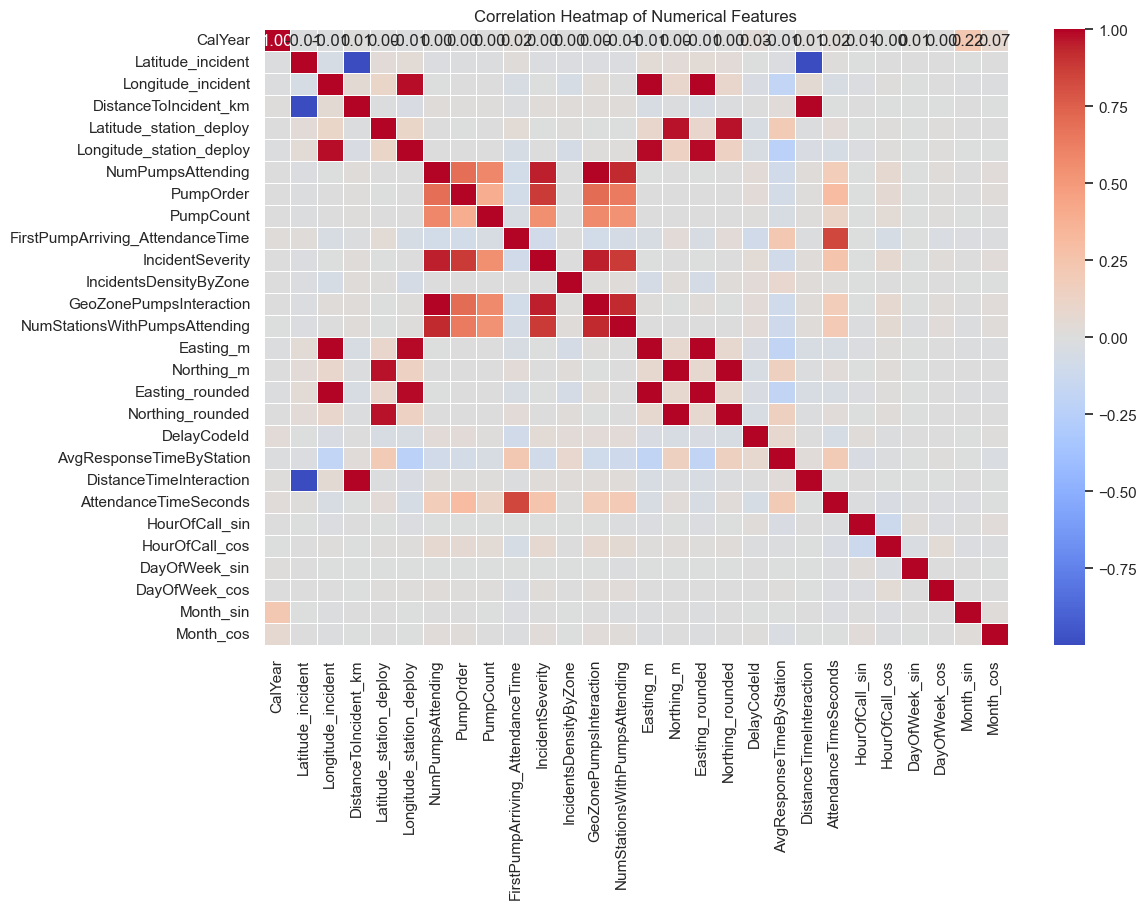

In [81]:
numerical_cols = lfb.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Features")

# Display the plot
plt.show()

On utilise un échantillon aléatiore de 200 000 individus.

In [42]:
lfb_sampled = lfb.sample(n=20000, random_state=42)

## Train test split et Nettoyage

In [43]:
X = lfb_sampled.drop(columns=["AttendanceTimeSeconds"])  
y = lfb_sampled["AttendanceTimeSeconds"]

# Séparation en jeu d'entraînement et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Nettoyage des colonnes numériques 
for col in X_train.select_dtypes(include=["float64", "int64"]).columns:
    median_value = X_train[col].median()  
    X_train[col].fillna(median_value, inplace=True)
    X_test[col].fillna(median_value, inplace=True)  

# Nettoyage des colonnes catégorielles 
for col in X_train.select_dtypes(include=['object']).columns:
    mode_value = X_train[col].mode()[0] 
    X_train[col].fillna(mode_value, inplace=True)
    X_test[col].fillna(mode_value, inplace=True)  

# Nettoyage des colonnes de dates 
for col in X_train.select_dtypes(include=['datetime64[ns]']).columns:
    default_date = pd.to_datetime('2022-01-05')  
    X_train[col].fillna(default_date, inplace=True)
    X_test[col].fillna(default_date, inplace=True)

In [44]:
display(X_train.info())
display(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 372482 to 255068
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CalYear                                 3500 non-null   int64  
 1   Geo_zone                                3500 non-null   object 
 2   Categ_geo                               3500 non-null   object 
 3   Latitude_incident                       3500 non-null   float64
 4   Longitude_incident                      3500 non-null   float64
 5   DistanceToIncident_km                   3500 non-null   float64
 6   Latitude_station_deploy                 3500 non-null   float64
 7   Longitude_station_deploy                3500 non-null   float64
 8   NumPumpsAttending                       3500 non-null   float64
 9   PumpOrder                               3500 non-null   int64  
 10  PumpCount                               3500 non-null   in

None

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 141376 to 421214
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CalYear                                 1500 non-null   int64  
 1   Geo_zone                                1500 non-null   object 
 2   Categ_geo                               1500 non-null   object 
 3   Latitude_incident                       1500 non-null   float64
 4   Longitude_incident                      1500 non-null   float64
 5   DistanceToIncident_km                   1500 non-null   float64
 6   Latitude_station_deploy                 1500 non-null   float64
 7   Longitude_station_deploy                1500 non-null   float64
 8   NumPumpsAttending                       1500 non-null   float64
 9   PumpOrder                               1500 non-null   int64  
 10  PumpCount                               1500 non-null   in

None

## Encodage 

In [45]:
# Variables numériques et catégorielles
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Convertir toutes les colonnes catégorielles en type string 
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

# Encodage des variables catégorielles avec OneHotEncoder (en ignorant les catégories inconnues dans le test)
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Ajouter les colonnes encodées dans les DataFrames d'origine
X_train_encoded = np.concatenate([X_train.drop(columns=categorical_cols).values, X_train_encoded], axis=1)
X_test_encoded = np.concatenate([X_test.drop(columns=categorical_cols).values, X_test_encoded], axis=1)

# Normalisation des variables numériques
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_encoded)
X_test_sc = scaler.transform(X_test_encoded)

# Vérifier la forme des matrices après encodage et normalisation
print(f"X_train shape: {X_train_sc.shape}")
print(f"X_test shape: {X_test_sc.shape}")

X_train shape: (3500, 1082)
X_test shape: (1500, 1082)


In [46]:
print("Nombre de colonnes numériques :", len(numerical_cols))
print("Nombre de colonnes encodées :", len(encoder.get_feature_names_out(categorical_cols)))
print("Nombre total de colonnes attendues :", len(numerical_cols) + len(encoder.get_feature_names_out(categorical_cols)))
print("Nombre total de colonnes dans X_train_sc :", X_train_sc.shape[1])


Nombre de colonnes numériques : 27
Nombre de colonnes encodées : 1054
Nombre total de colonnes attendues : 1081
Nombre total de colonnes dans X_train_sc : 1082


In [48]:
# Vérifier et ajuster les colonnes si nécessaire
X_train_df = pd.DataFrame(X_train_sc[:, :len(numerical_cols) + len(encoder.get_feature_names_out(categorical_cols))], 
                          columns=numerical_cols.tolist() + encoder.get_feature_names_out(categorical_cols).tolist())

X_train_df.to_csv('X_train_encoded_5000.csv', index=False)

# Random Forest avec recherche des hyperparamètres

In [91]:
rf = RandomForestRegressor(random_state=42)

# Définition des paramètres à tester
param_rf = {
    "max_features": ["sqrt", "log2"],
    "min_samples_split": np.arange(2, 20, 2)}

# Utilisation de RandomizedSearchCV avec un nombre limité d'itérations
random_search_rf = RandomizedSearchCV(rf, param_rf, cv=5, scoring="neg_mean_squared_error", n_iter=10, n_jobs=-1)
random_search_rf.fit(X_train_sc, y_train)

# Meilleurs paramètres
best_param_rf = random_search_rf.best_params_
print("Meilleurs paramètres :", best_param_rf)

# Entraînement avec les meilleurs hyperparamètres
rf_best = RandomForestRegressor(**best_param_rf, random_state=42)
rf_best.fit(X_train_sc, y_train)

# Prédiction et évaluation
y_pred_rf_best = rf_best.predict(X_test_sc)

# Évaluation des performances du modèle
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_rf_best))
mse_final = mean_squared_error(y_test, y_pred_rf_best)
mae_final = mean_absolute_error(y_test, y_pred_rf_best)
r2_final = r2_score(y_test, y_pred_rf_best)
medae_final = median_absolute_error(y_test, y_pred_rf_best)

print("RMSE:", rmse_final)
print("R²:", r2_final)
print("MAE:", mae_final)
print("MSE:", mse_final)
print("MedAE:", medae_final)

Meilleurs paramètres : {'min_samples_split': 2, 'max_features': 'sqrt'}
RMSE: 54.7967637493585
R²: 0.7902576593236635
MAE: 37.484719444444444
MSE: 3002.6853174030093
MedAE: 25.144999999999982


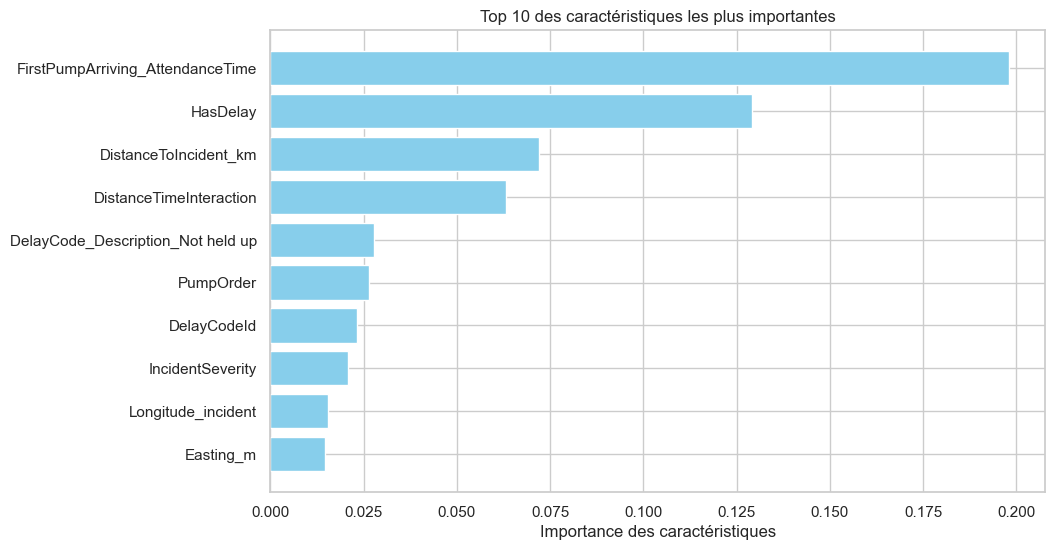

In [92]:
importances = rf_best.feature_importances_

# Récupération des noms de colonnes avant encodage
feature_names = np.concatenate([X_train.drop(columns=categorical_cols).columns, encoder.get_feature_names_out(categorical_cols)])

# importance des caractéristiques (en conservant seulement les 10 plus importantes)
sorted_indices = np.argsort(importances)[::-1][:10] 
plt.figure(figsize=(10, 6))
plt.title("Top 10 des caractéristiques les plus importantes")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align="center", color="skyblue")
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance des caractéristiques")
plt.show()

In [93]:
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances*100})

# Tri par importance décroissante
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Afficher les importances des caractéristiques
print(feature_importance.head(20))

                                           Feature  Importance
9                 FirstPumpArriving_AttendanceTime   19.792545
12                                        HasDelay   12.917602
3                            DistanceToIncident_km    7.210165
21                         DistanceTimeInteraction    6.322682
927              DelayCode_Description_Not held up    2.771588
7                                        PumpOrder    2.646140
19                                     DelayCodeId    2.330914
10                                IncidentSeverity    2.073542
2                               Longitude_incident    1.545136
15                                       Easting_m    1.469373
16                                      Northing_m    1.442884
1                                Latitude_incident    1.432779
17                                 Easting_rounded    1.403299
18                                Northing_rounded    1.387039
20                        AvgResponseTimeByStation    1

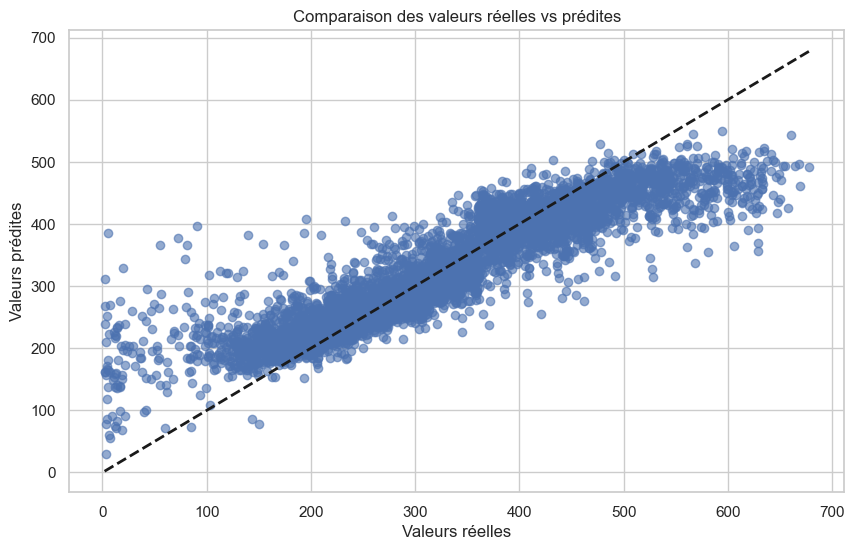

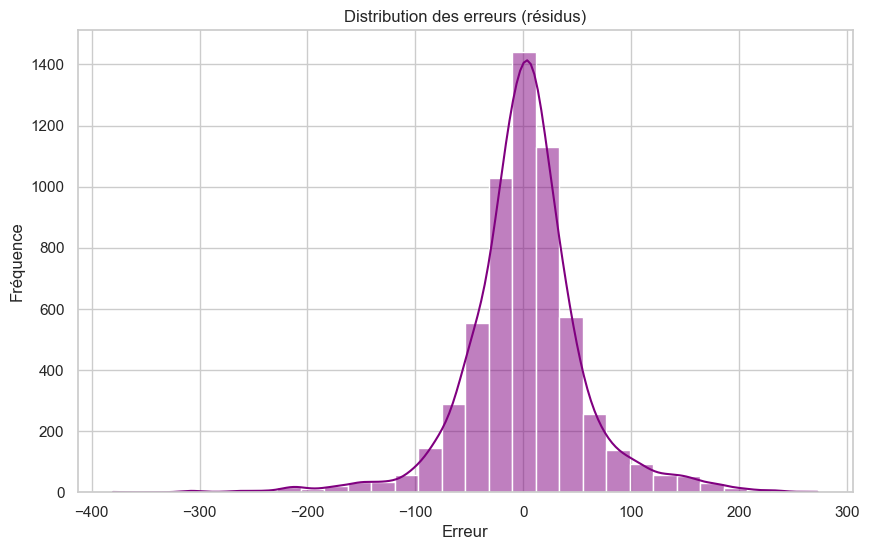

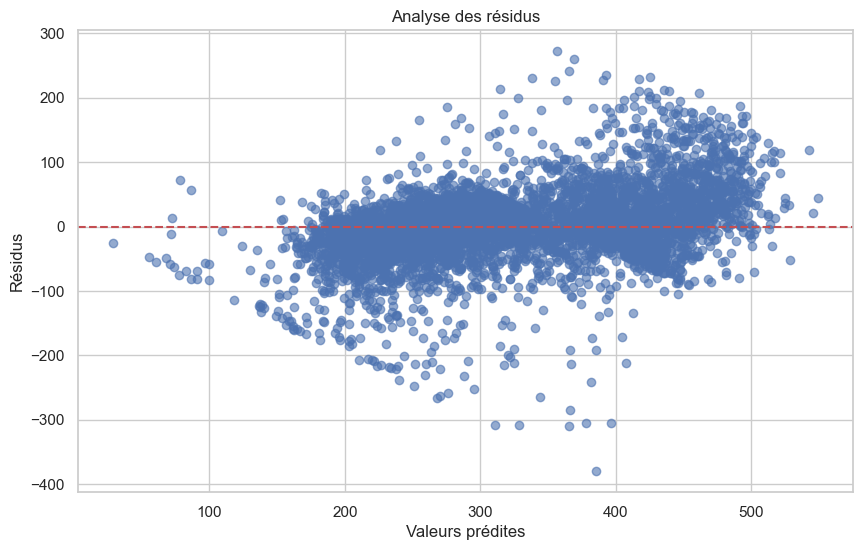

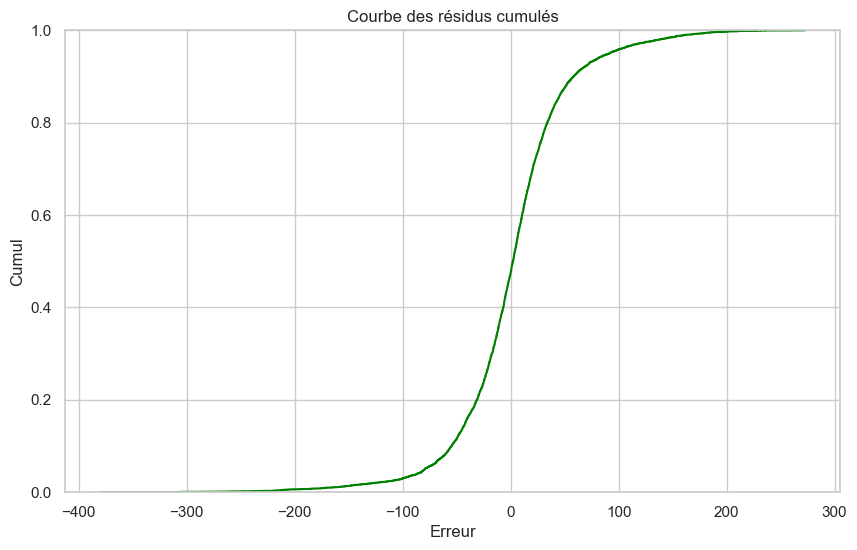

In [94]:
# 1. Graphique : Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Comparaison des valeurs réelles vs prédites")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

# 2. Graphique : Histogramme des erreurs (résidus)
errors = y_test - y_pred_rf_best
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Distribution des erreurs (résidus)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 3. Graphique : Analyse des résidus (résidus vs valeurs prédites)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_best, errors, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Analyse des résidus")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# 4. Graphique : Courbe des résidus cumulés
plt.figure(figsize=(10, 6))
sns.ecdfplot(errors, color="green")
plt.title("Courbe des résidus cumulés")
plt.xlabel("Erreur")
plt.ylabel("Cumul")
plt.grid(True)
plt.show()

# Random Forest min_samples_split=2, max_features='sqrt'

In [99]:
rf = RandomForestRegressor(min_samples_split=2, max_features='sqrt', random_state=42)

# Entraînement du modèle
rf.fit(X_train_sc, y_train)

# Prédiction sur le jeu de test
y_pred_rf = rf.predict(X_test_sc)

# Évaluation des performances du modèle
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_final = mean_squared_error(y_test, y_pred_rf)
mae_final = mean_absolute_error(y_test, y_pred_rf)
r2_final = r2_score(y_test, y_pred_rf)
medae_final = median_absolute_error(y_test, y_pred_rf)

# Affichage des résultats
print("RMSE:", rmse_final)
print("R²:", r2_final)
print("MAE:", mae_final)
print("MSE:", mse_final)
print("MedAE:", medae_final)

RMSE: 47.45750154699462
R²: 0.843668408649996
MAE: 31.98477698921079
MSE: 2252.214453082997
MedAE: 21.379999999999995


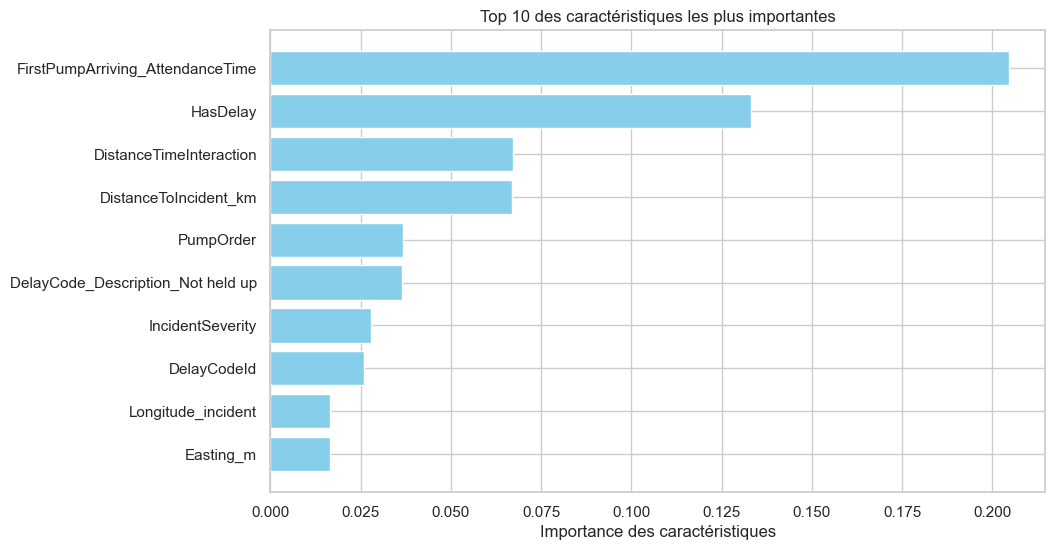

In [100]:
importances = rf.feature_importances_

# Récupération des noms de colonnes avant encodage
feature_names = np.concatenate([X_train.drop(columns=categorical_cols).columns, encoder.get_feature_names_out(categorical_cols)])

# importance des caractéristiques (en conservant seulement les 10 plus importantes)
sorted_indices = np.argsort(importances)[::-1][:10] 
plt.figure(figsize=(10, 6))
plt.title("Top 10 des caractéristiques les plus importantes")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align="center", color="skyblue")
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance des caractéristiques")
plt.show()

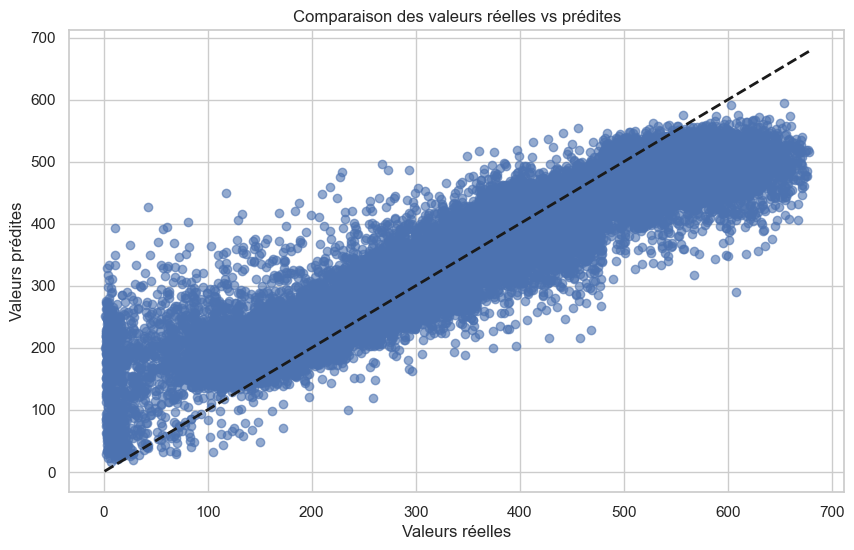

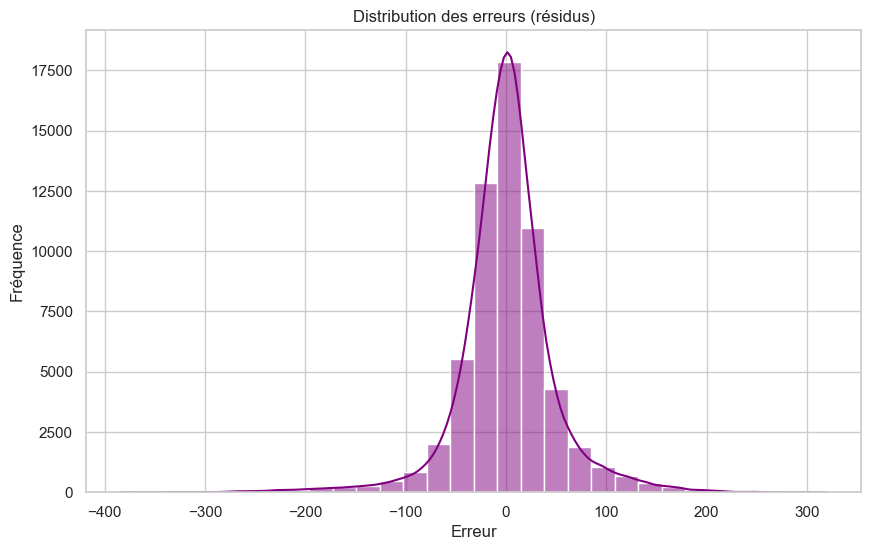

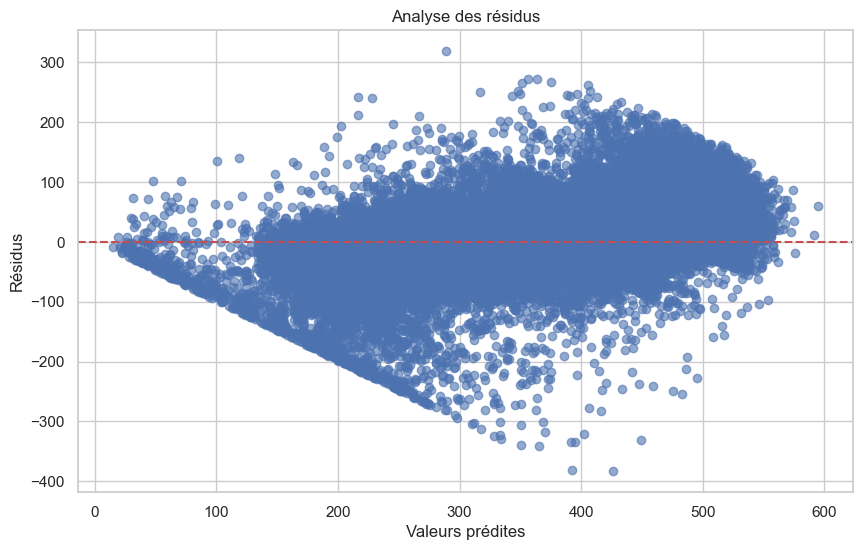

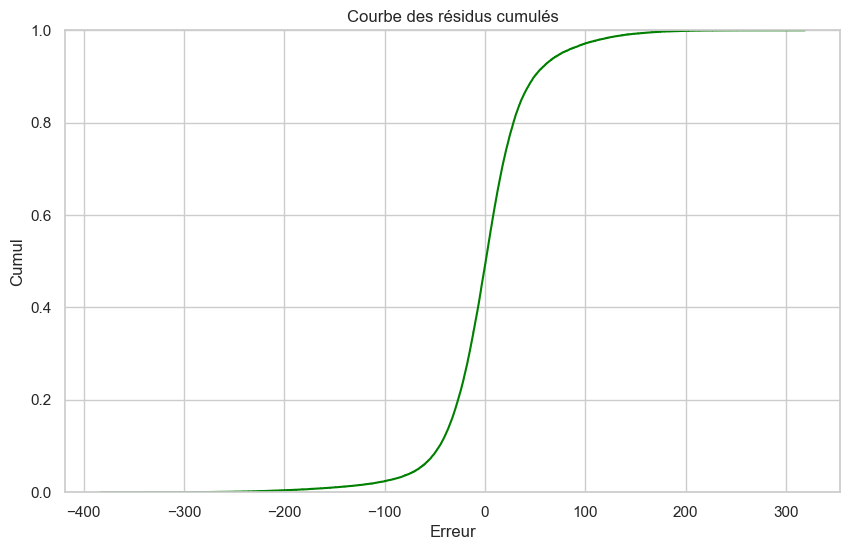

In [101]:
# 1. Graphique : Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Comparaison des valeurs réelles vs prédites")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

# 2. Graphique : Histogramme des erreurs (résidus)
errors = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Distribution des erreurs (résidus)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 3. Graphique : Analyse des résidus (résidus vs valeurs prédites)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, errors, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Analyse des résidus")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# 4. Graphique : Courbe des résidus cumulés
plt.figure(figsize=(10, 6))
sns.ecdfplot(errors, color="green")
plt.title("Courbe des résidus cumulés")
plt.xlabel("Erreur")
plt.ylabel("Cumul")
plt.grid(True)
plt.show()

# Regression de Lasso avec recherche des hyperparamètres

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000, random_state=42)

param_lasso = {"alpha": np.logspace(-3, 0, 20)}

random_search_lasso = RandomizedSearchCV(lasso, param_lasso, cv=5, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42)
random_search_lasso.fit(X_train_sc, y_train)

# Meilleurs paramètres
best_param_lasso = random_search_lasso.best_params_
print("Meilleurs paramètres pour Lasso:", best_param_lasso)

lasso_best = Lasso(**best_param_lasso, max_iter=5000, random_state=42)
lasso_best.fit(X_train_sc, y_train)

y_pred_lasso_best = lasso_best.predict(X_test_sc)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_best))
r2_lasso = r2_score(y_test, y_pred_lasso_best)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_best)
mse_lasso = mean_squared_error(y_test, y_pred_lasso_best)
medae_lasso = median_absolute_error(y_test, y_pred_lasso_best)

print("RMSE:", rmse_lasso)
print("R²:", r2_lasso)
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("MedAE:", medae_lasso)

Meilleurs paramètres pour Lasso: {'alpha': 0.3359818286283781}
RMSE: 40.623398953392105
R²: 0.878737401304899
MAE: 24.94076159010507
MSE: 1650.2605425264587
MedAE: 15.877268590254744


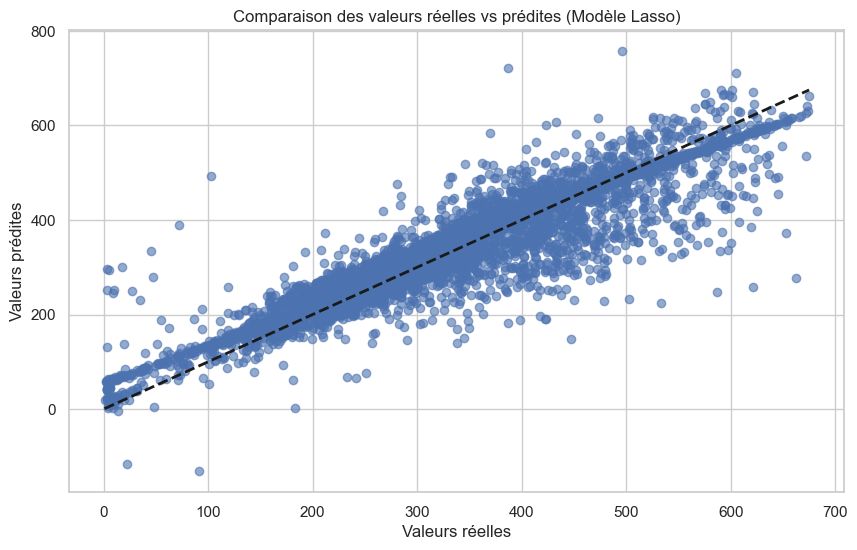

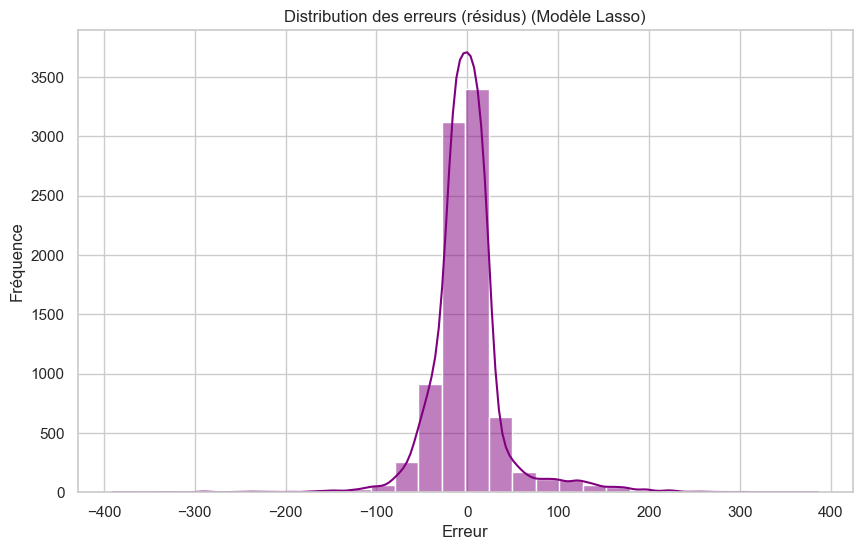

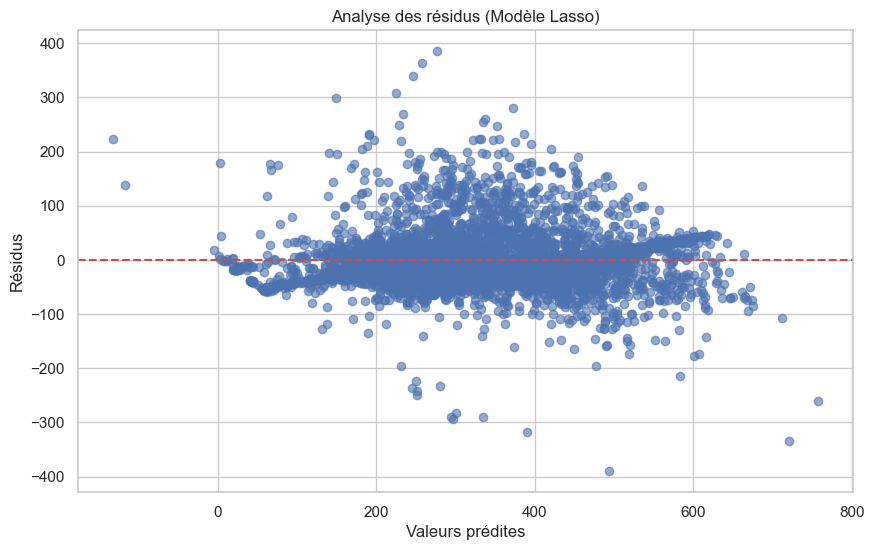

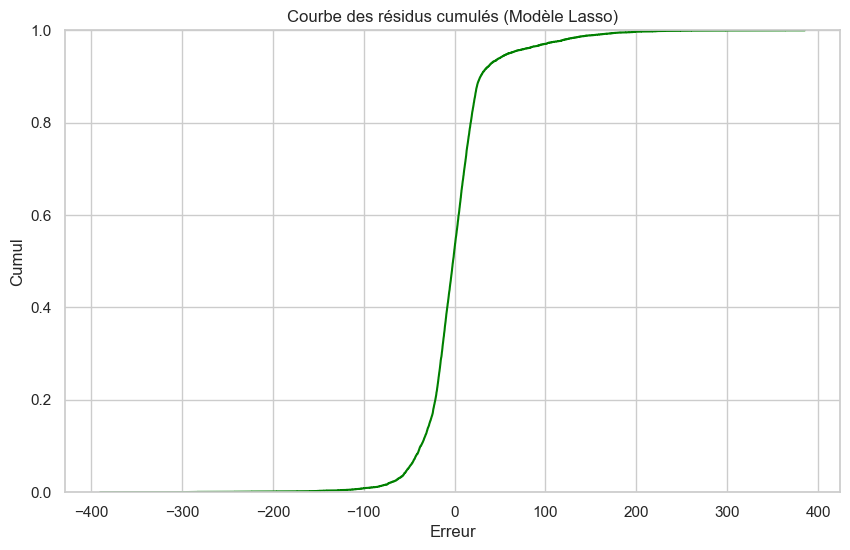

In [232]:
# 1. Graphique : Comparaison des valeurs réelles et prédites pour le modèle Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Comparaison des valeurs réelles vs prédites (Modèle Lasso)")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

# 2. Graphique : Histogramme des erreurs (résidus) pour le modèle Lasso
errors = y_test - y_pred_lasso_best
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Distribution des erreurs (résidus) (Modèle Lasso)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 3. Graphique : Analyse des résidus (résidus vs valeurs prédites) pour le modèle Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso_best, errors, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Analyse des résidus (Modèle Lasso)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# 4. Graphique : Courbe des résidus cumulés pour le modèle Lasso
plt.figure(figsize=(10, 6))
sns.ecdfplot(errors, color="green")
plt.title("Courbe des résidus cumulés (Modèle Lasso)")
plt.xlabel("Erreur")
plt.ylabel("Cumul")
plt.grid(True)
plt.show()

# Regression de lasso avec alpha = 0.3

In [102]:
lasso_model = Lasso(alpha=0.3, max_iter=10000, random_state=42)

lasso_model.fit(X_train_sc, y_train)
y_pred_lasso = lasso_model.predict(X_test_sc)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
medae_lasso = median_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression (alpha = 0.3) Performances :")
print("RMSE:", rmse_lasso)
print("R²:", r2_lasso)
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("MedAE:", medae_lasso)

Lasso Regression (alpha = 0.3) Performances :
RMSE: 40.50728999139992
R²: 0.8861053338853838
MAE: 25.190362094298372
MSE: 1640.8405424473685
MedAE: 16.742184218489854


In [ ]:
import joblib
joblib.dump(lasso_model, 'model_lasso.pkl')

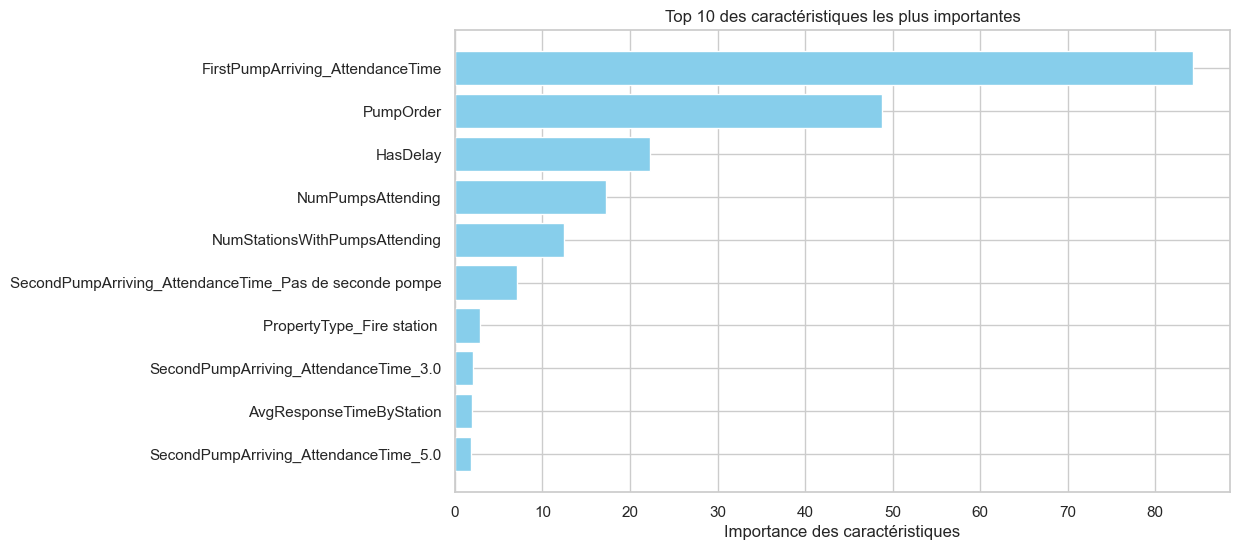

In [103]:
importances = np.abs(lasso_model.coef_)

# Récupération des noms de colonnes avant encodage
feature_names = np.concatenate([X_train.drop(columns=categorical_cols).columns, encoder.get_feature_names_out(categorical_cols)])

# Importance des caractéristiques (en conservant seulement les 10 plus importantes)
sorted_indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.title("Top 10 des caractéristiques les plus importantes")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align="center", color="skyblue")
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance des caractéristiques")
plt.show()

In [104]:
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances})

# Tri par importance décroissante
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Afficher les importances des caractéristiques
print(feature_importance.head(20))

                                                Feature  Importance
9                      FirstPumpArriving_AttendanceTime   84.308936
7                                             PumpOrder   48.775374
12                                             HasDelay   22.231762
6                                     NumPumpsAttending   17.260384
14                        NumStationsWithPumpsAttending   12.419868
1201  SecondPumpArriving_AttendanceTime_Pas de secon...    7.053949
1405                         PropertyType_Fire station     2.852885
459               SecondPumpArriving_AttendanceTime_3.0    2.065155
20                             AvgResponseTimeByStation    1.915488
680               SecondPumpArriving_AttendanceTime_5.0    1.826000
1321                SpecialServiceType_Medical Incident    1.815927
569               SecondPumpArriving_AttendanceTime_4.0    1.641104
1010              SecondPumpArriving_AttendanceTime_8.0    1.555689
349               SecondPumpArriving_AttendanceT

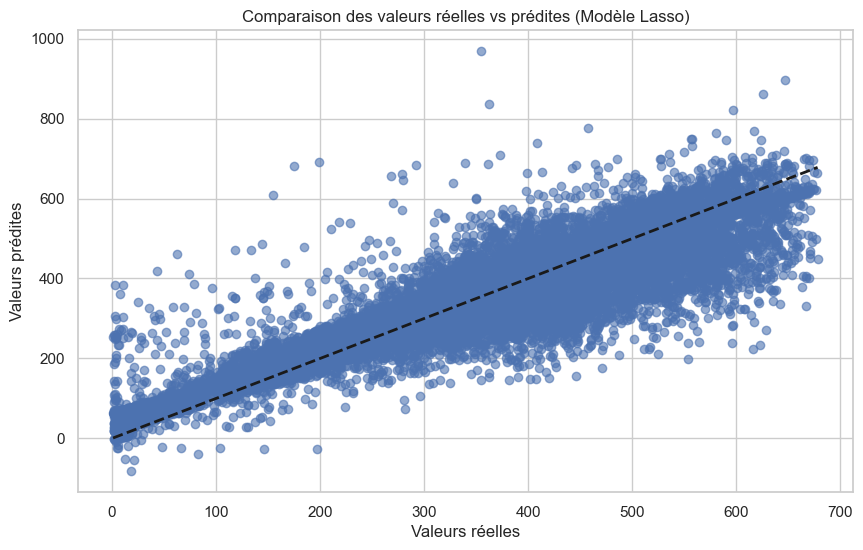

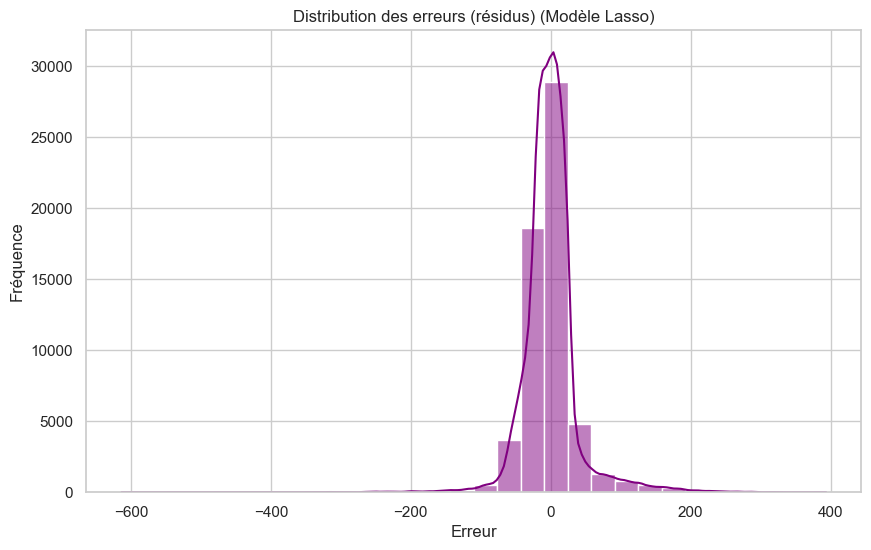

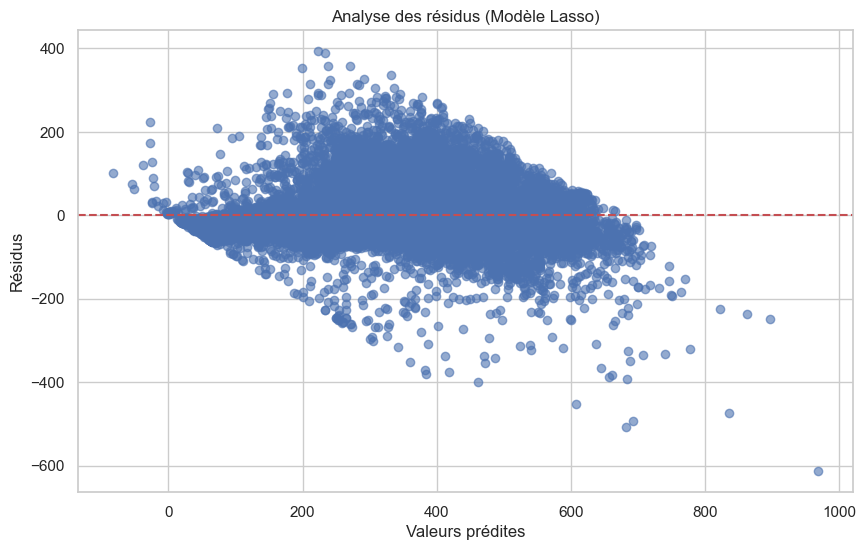

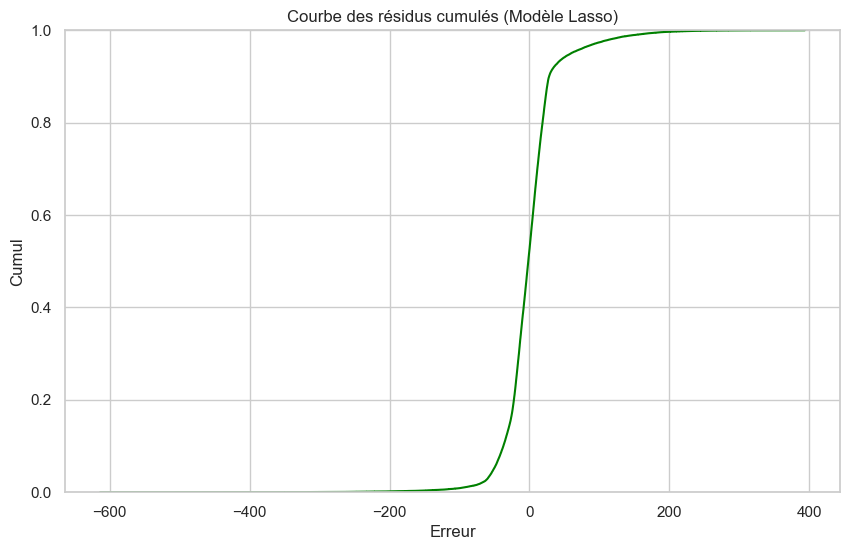

In [105]:
# 1. Graphique : Comparaison des valeurs réelles et prédites pour le modèle Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Comparaison des valeurs réelles vs prédites (Modèle Lasso)")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

# 2. Graphique : Histogramme des erreurs (résidus) pour le modèle Lasso
errors = y_test - y_pred_lasso
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Distribution des erreurs (résidus) (Modèle Lasso)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 3. Graphique : Analyse des résidus (résidus vs valeurs prédites) pour le modèle Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, errors, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Analyse des résidus (Modèle Lasso)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# 4. Graphique : Courbe des résidus cumulés pour le modèle Lasso
plt.figure(figsize=(10, 6))
sns.ecdfplot(errors, color="green")
plt.title("Courbe des résidus cumulés (Modèle Lasso)")
plt.xlabel("Erreur")
plt.ylabel("Cumul")
plt.grid(True)
plt.show()

# ElasticNet avec recherche des hyperparamètres

In [37]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(max_iter=5000, random_state=42)

# Définition des paramètres à tester pour ElasticNet (valeurs d'alpha et de l1_ratio)
param_elastic_net = {
    "alpha": np.logspace(-3, 0, 20),
    "l1_ratio": np.linspace(0.1, 1, 10)}

# Chercher les meilleurs paramètres
random_search_elastic_net = RandomizedSearchCV(elastic_net, param_elastic_net, cv=5, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42)
random_search_elastic_net.fit(X_train_sc, y_train)

# Meilleurs paramètres
best_param_elastic_net = random_search_elastic_net.best_params_
print("Meilleurs paramètres pour ElasticNet:", best_param_elastic_net)

# Train
elastic_net_best = ElasticNet(**best_param_elastic_net, max_iter=5000, random_state=42)
elastic_net_best.fit(X_train_sc, y_train)

y_pred_elastic_net_best = elastic_net_best.predict(X_test_sc)

rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net_best))
r2_elastic_net = r2_score(y_test, y_pred_elastic_net_best)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net_best)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net_best)
medae_elastic_net = median_absolute_error(y_test, y_pred_elastic_net_best)

print("RMSE:", rmse_elastic_net)
print("R²:", r2_elastic_net)
print("MAE:", mae_elastic_net)
print("MSE:", mse_elastic_net)
print("MedAE:", medae_elastic_net)

Meilleurs paramètres pour ElasticNet: {'l1_ratio': 0.9, 'alpha': 0.23357214690901212}
RMSE: 42.82104246876511
R²: 0.8740398176602928
MAE: 26.551892074115237
MSE: 1833.641678111785
MedAE: 17.43072048605191


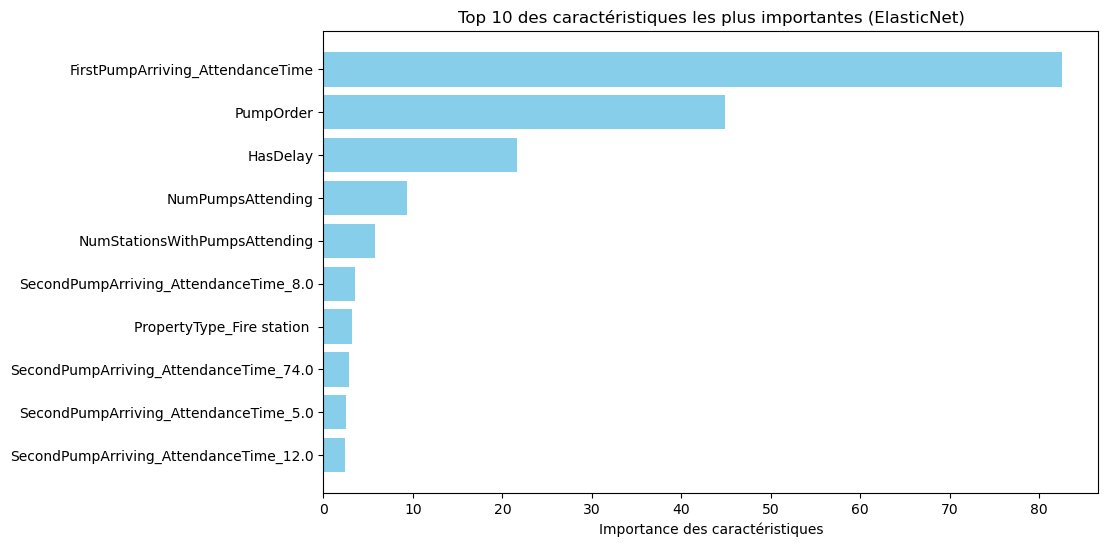

In [43]:
importances = np.abs(elastic_net_best.coef_)

# Récupération des noms des colonnes avant encodage
feature_names = np.concatenate([X_train.drop(columns=categorical_cols).columns, encoder.get_feature_names_out(categorical_cols)])

# Importance des caractéristiques (en conservant seulement les 10 plus importantes)
sorted_indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.title("Top 10 des caractéristiques les plus importantes (ElasticNet)")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align="center", color="skyblue")
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance des caractéristiques")
plt.show()

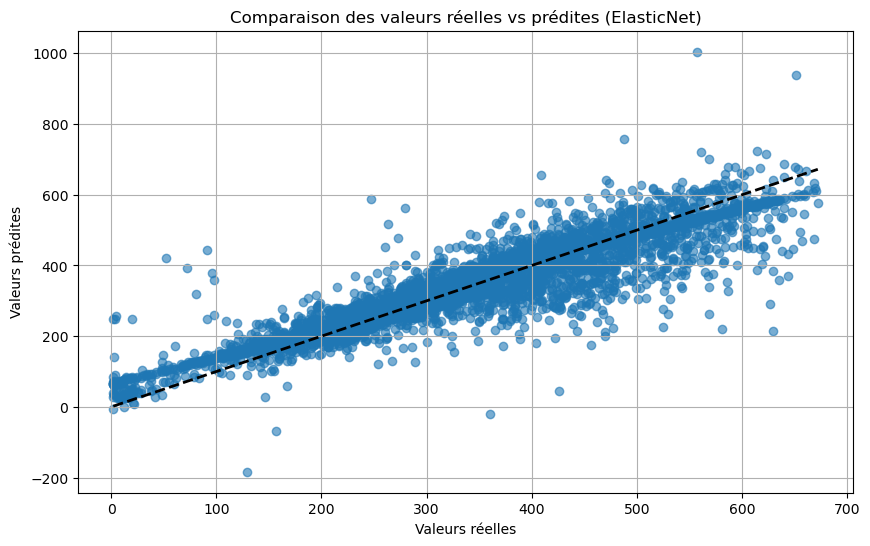

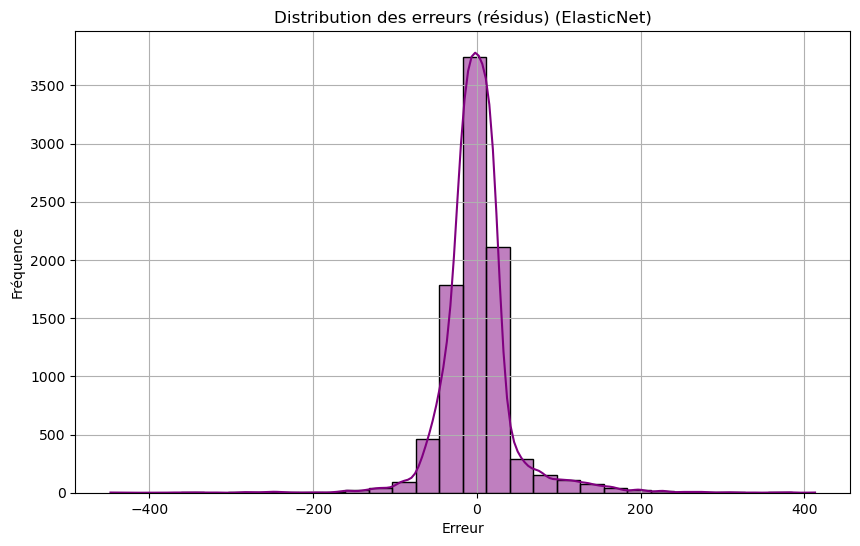

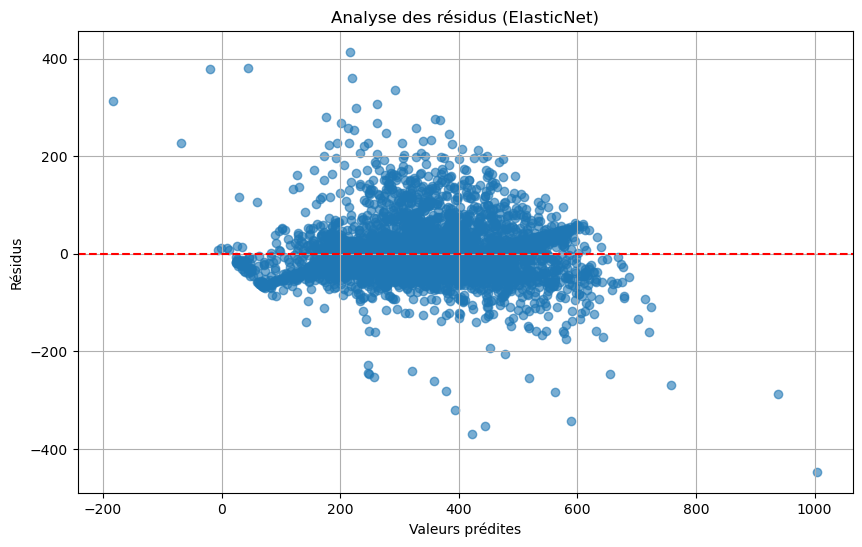

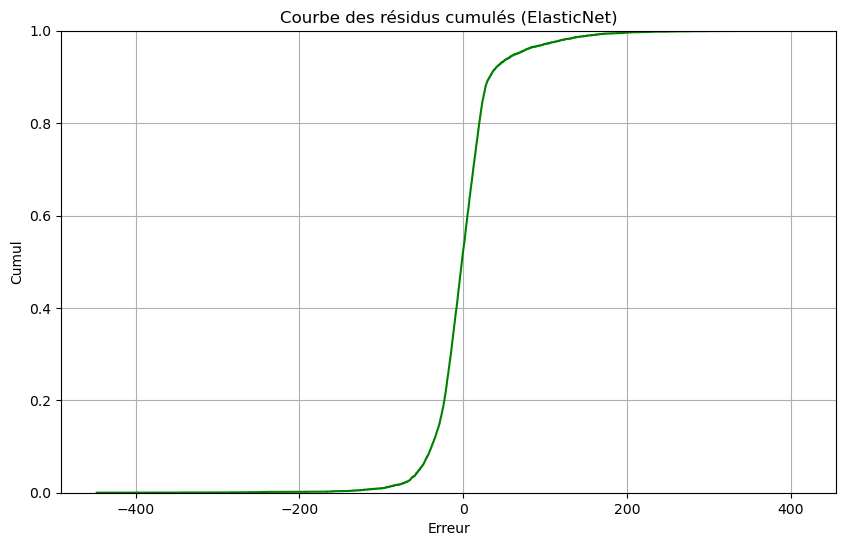

In [39]:
# 1. Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Comparaison des valeurs réelles vs prédites (ElasticNet)")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

# 2. Histogramme des erreurs (résidus)
errors = y_test - y_pred_elastic_net_best
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Distribution des erreurs (résidus) (ElasticNet)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 3. Analyse des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_elastic_net_best, errors, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Analyse des résidus (ElasticNet)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# 4. Courbe des résidus cumulés
plt.figure(figsize=(10, 6))
sns.ecdfplot(errors, color="green")
plt.title("Courbe des résidus cumulés (ElasticNet)")
plt.xlabel("Erreur")
plt.ylabel("Cumul")
plt.grid(True)
plt.show()

# Elastic NET

In [49]:
# Initialisation du modèle ElasticNet avec les hyperparamètres définis manuellement
elastic_net = ElasticNet(alpha=0.233, l1_ratio=0.9, max_iter=5000, random_state=42)

# Entraînement du modèle
elastic_net.fit(X_train_sc, y_train)

# Prédictions sur le jeu de test
y_pred_elastic_net = elastic_net.predict(X_test_sc)

# Calcul des métriques de performance
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
medae_elastic_net = median_absolute_error(y_test, y_pred_elastic_net)

# Affichage des résultats
print("ElasticNet Regression Performances :")
print("RMSE:", rmse_elastic_net)
print("R²:", r2_elastic_net)
print("MAE:", mae_elastic_net)
print("MSE:", mse_elastic_net)
print("MedAE:", medae_elastic_net)

ElasticNet Regression Performances :
RMSE: 48.65948021184131
R²: 0.8362127165995853
MAE: 29.607528875843485
MSE: 2367.7450144865766
MedAE: 17.76480954934665


In [50]:
import joblib
joblib.dump(elastic_net, 'model_elasticnet_5000.pkl')

['model_elasticnet_5000.pkl']

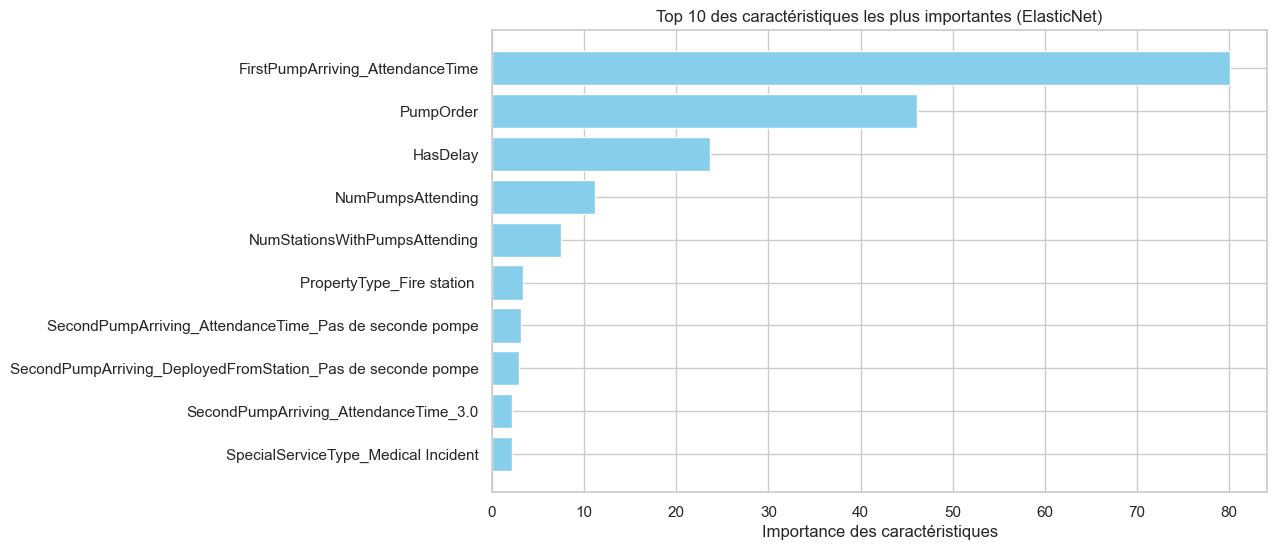

In [109]:
importances = np.abs(elastic_net.coef_)

# Récupération des noms des colonnes avant encodage
feature_names = np.concatenate([X_train.drop(columns=categorical_cols).columns, encoder.get_feature_names_out(categorical_cols)])

# Importance des caractéristiques (en conservant seulement les 10 plus importantes)
sorted_indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.title("Top 10 des caractéristiques les plus importantes (ElasticNet)")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align="center", color="skyblue")
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance des caractéristiques")
plt.show()

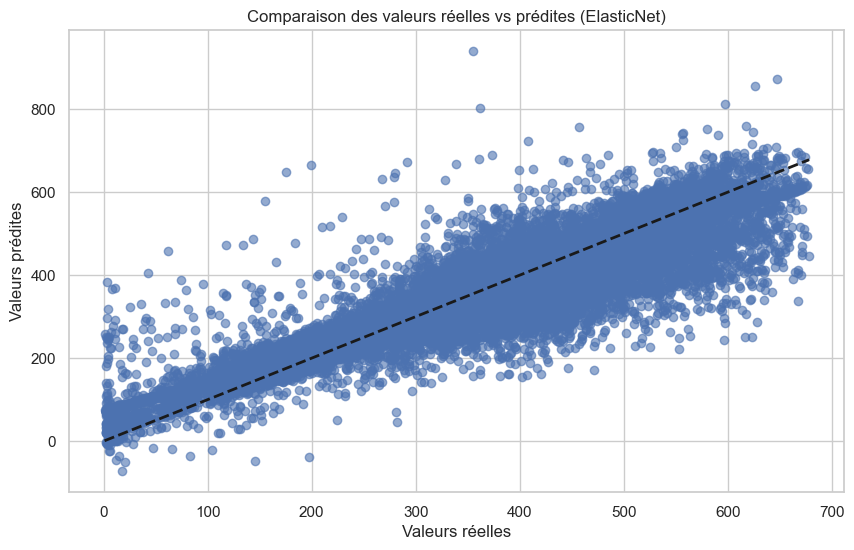

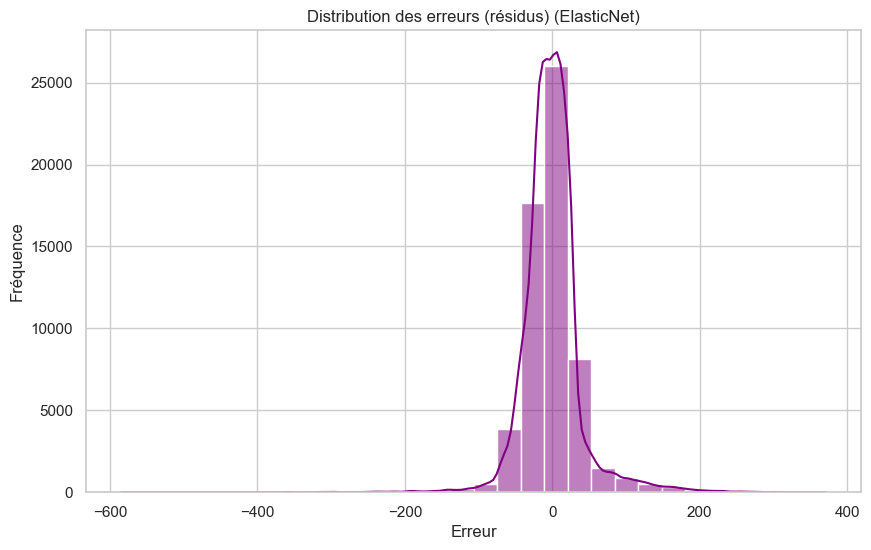

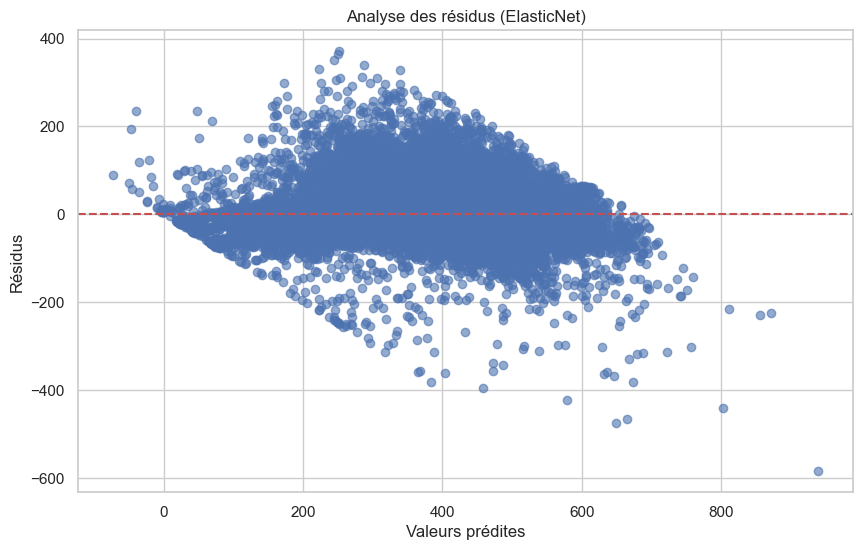

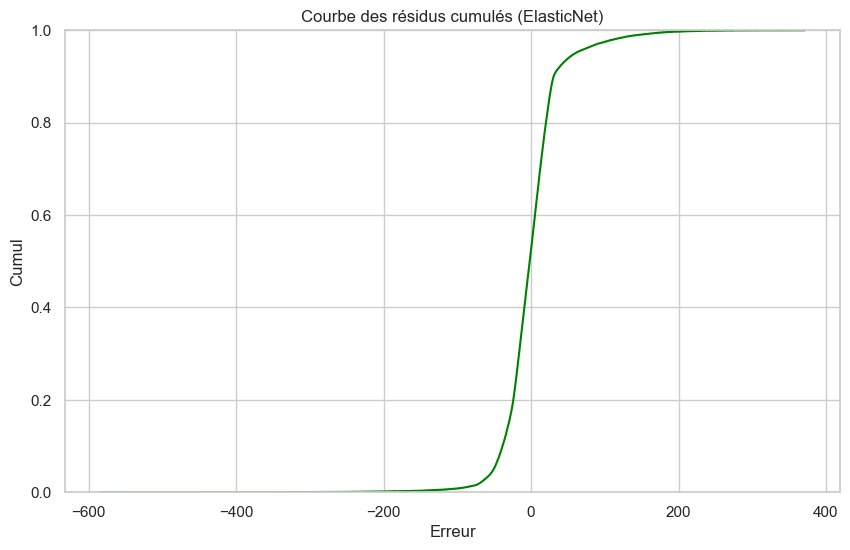

In [110]:
# 1. Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Comparaison des valeurs réelles vs prédites (ElasticNet)")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

# 2. Histogramme des erreurs (résidus)
errors = y_test - y_pred_elastic_net
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Distribution des erreurs (résidus) (ElasticNet)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 3. Analyse des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_elastic_net, errors, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Analyse des résidus (ElasticNet)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# 4. Courbe des résidus cumulés
plt.figure(figsize=(10, 6))
sns.ecdfplot(errors, color="green")
plt.title("Courbe des résidus cumulés (ElasticNet)")
plt.xlabel("Erreur")
plt.ylabel("Cumul")
plt.grid(True)
plt.show()